# Нарушения работы метрополитена

## Описание проекта

В нашем распоряжении датасет с нарушениями работы метрополитена, классифицированными по типам, причинам, общим причинам нарушения, устройствам и деталям устройств. 
Необходимо исследовать, визуализировать данные, определить закономерности в нарушениях работы метрополитена, сформулировать аргументированные выводы.

Службы метрополитена:  
ЭС - эскалаторная служба;  
Б - служба безопасности;  
ДИТС - дирекция информационных технологий и систем связи;  
П - служба пути;  
Т - служба подвижного состава;  
Ш - служба сигнализации, централизации и блокировки;  
Э - служба электроснабжения;  
ЭМ - электромеханическая служба;  
СПО - служба пассажирских обустройств.  

**Цель:**
найти закономерности в нарушениях работы метрополитена

**Задачи:**  
* исследовать данные, показать навыки работы с ними;  
* визуализировать данные;  
* найти закономерности;  
* сформулировать выводы;  
* подготовить аргументацию для выводов.

**Описание данных:**  
Начало случая  
Окончание случая  
Перерыв в движении, мин	  
id станции	 
Станционный путь	
Перегон	 
Кол-во опоздавших поездов	
Кол-во минут опоздания	
Кол-во полных отмен	 
Кол-во участковых отмен	 
Кол-во внеплановых высадок пассажиров	
Линия	
Ответственная служба	
Тип нарушения	
Причины возникновения	
Наименование устройства	 
Наименование детали устройства	 
Общая причина возникновения


## План работы
#### 1. Загрузить данные, изучить общую информацию
#### 2. Предобработка данных:
* Исследовать пропущенные значения;  
* Исследовать соответствие типов;  
* Исследовать дубликаты;  
* Проверить корректность наименований колонок;  
* Переименовать колонки  

#### 3. Исследовательский анализ данных:
- изучить параменты данных и построить визуализацию для каждого из этих параметров;
- описать наблюдения по параметрам;

#### 4. Сформулировать выводы
#### 5. Подготовить презентацию в PP
#### 6. Подготовить отчет в Excel


----

### 1. Загрузить данные, изучить общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import plotly.express as px
from plotly import graph_objects as go

In [2]:
#загружаем данные
df = pd.read_excel(r'C:\Users\Айза\Desktop\Метрополитен\нарушения ММ.xlsx', sheet_name='Исходник')
df

,Начало случая,Окончание случая,"Перерыв в движении, мин",id станции,Станционный путь,Перегон,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров,Линия,Ответственная служба,Тип нарушения,Причины возникновения,Наименование устройства,Наименование детали устройства,Общая причина возникновения
0,1974-01-01 00:00:00,2022-01-01 00:01:00.000000,0,83.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора из-за нарушения правил по...,Остановка эскалатора из-за нарушения правил по...,Эскалатор,NaN,Действия пассажиров
1,1974-01-01 00:01:00,2022-01-01 00:03:00.000000,0,87.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,NaN,Действия пассажиров
2,1974-01-01 00:06:00,2022-01-01 00:08:00.000000,0,49.0,NaN,NaN,0,0,0,0,0,Бутовская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров
3,1974-01-01 00:11:00,2022-01-01 00:13:00.000000,0,274.0,NaN,NaN,0,0,0,0,0,Таганско-краснопресненская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров
4,1974-01-01 00:13:00,2022-01-01 00:14:59.999999,0,81.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Падение пассажира на эскалаторе без травм,Падение пассажира на эскалаторе без травм,Эскалатор,Огибной участок,Действия пассажиров
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102146,1975-12-25 23:26:00,2023-12-25 23:27:00.000000,0,81.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Падение пассажира на эскалаторе без травм,Падение пассажира на эскалаторе без травм,Эскалатор,Вогнутый участок,Действия пассажиров
102147,1975-12-25 23:44:00,2023-12-25 23:51:00.000000,0,298.0,NaN,NaN,0,0,0,0,0,Большая кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,NaN,Действия пассажиров
102148,1975-12-25 23:45:00,2023-12-25 23:46:00.000000,0,254.0,NaN,NaN,0,0,0,0,0,Серпуховско-тимирязевская,ЭС,Падение пассажира на эскалаторе без травм,Падение пассажира на эскалаторе без травм,Эскалатор,Середина наклона,Действия пассажиров
102149,1975-12-25 23:53:00,2023-12-25 23:56:00.000000,0,275.0,NaN,NaN,0,0,0,0,0,Таганско-краснопресненская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров


In [3]:
#изучаем общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102151 entries, 0 to 102150
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Начало случая                          102151 non-null  datetime64[ns]
 1   Окончание случая                       102151 non-null  datetime64[ns]
 2   Перерыв в движении, мин                102151 non-null  int64         
 3   id станции                             98111 non-null   float64       
 4   Станционный путь                       13517 non-null   object        
 5   Перегон                                4040 non-null    object        
 6   Кол-во опоздавших поездов              102151 non-null  int64         
 7   Кол-во минут опоздания                 102151 non-null  int64         
 8   Кол-во полных отмен                    102151 non-null  int64         
 9   Кол-во участковых отмен                102151 no

In [4]:
df.describe()

,"Перерыв в движении, мин",id станции,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров
count,102151.000000,98111.000000,102151.000000,102151.000000,102151.000000,102151.000000,102151.000000
mean,0.048898,133.940027,0.002379,0.046255,0.004944,0.145500,0.080792
std,1.655264,88.301054,0.049907,1.508340,0.111875,1.176239,0.837965
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,215.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,330.000000,307.000000,2.000000,320.000000,15.000000,202.000000,202.000000


### 2. Предобработка данных

In [5]:
#проверяем наличие пропусков
df.isna().sum()

Начало случая                                0
Окончание случая                             0
Перерыв в движении, мин                      0
id станции                                4040
Станционный путь                         88634
Перегон                                  98111
Кол-во опоздавших поездов                    0
Кол-во минут опоздания                       0
Кол-во полных отмен                          0
Кол-во участковых отмен                      0
Кол-во внеплановых высадок пассажиров        0
Линия                                        0
Ответственная служба                         0
Тип нарушения                                0
Причины возникновения                        0
Наименование устройства                    150
Наименование детали устройства           64170
Общая причина возникновения                  0
dtype: int64

In [6]:
#исследуем природу пропусков
df_nan_station_id = df[df['id станции'].isna()]
df_nan_station_id.head()

,Начало случая,Окончание случая,"Перерыв в движении, мин",id станции,Станционный путь,Перегон,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров,Линия,Ответственная служба,Тип нарушения,Причины возникновения,Наименование устройства,Наименование детали устройства,Общая причина возникновения
56,1974-01-01 03:34:00,2022-01-01 03:54:00.000000,0,NaN,NaN,64 - 63,0,0,0,0,0,Арбатско-покровская,Т,Неисправность подвижного состава или хозяйстве...,Срабатывание экстренного тормоза,Состав,"ПО САУ ""Витязь""",Отказ/неисправность технических средств
83,1974-01-01 05:49:00,2022-01-01 06:04:00.000000,0,NaN,NaN,65 - 69,0,0,0,0,0,Большая кольцевая,Т,Неисправность подвижного состава или хозяйстве...,Срабатывание экстренного тормоза,Состав,Срывной клапан,Отказ/неисправность технических средств
103,1974-01-01 07:26:00,1974-01-01 08:31:00.000000,0,NaN,NaN,66 - 70,0,0,0,0,0,Калужско-рижская,Б,Срабатывание сигнализации шахты,Неисправность сигнализации ВШ,ВШ,"Прибор ""Болид""",Отказ/неисправность технических средств
138,1974-01-01 12:30:00,2022-01-02 04:40:00.000001,0,NaN,NaN,63 - 71,0,0,0,0,0,Арбатско-покровская,Ш,Отсутствие частоты (нулевая частота) на рельсо...,Неисправность устройств СЦБ,Реле,1759П,Отказ/неисправность технических средств
145,1974-01-01 14:17:00,2022-01-01 15:05:00.000000,0,NaN,NaN,72 - 78,0,0,0,0,0,Замоскворецкая,Б,Срабатывание сигнализации шахты,Неисправность сигнализации ВШ,ВШ,"Прибор ""Антей""",Отказ/неисправность технических средств


In [7]:
df_nan_station_track = df[df['Станционный путь'].isna()]
df_nan_station_track.head()

,Начало случая,Окончание случая,"Перерыв в движении, мин",id станции,Станционный путь,Перегон,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров,Линия,Ответственная служба,Тип нарушения,Причины возникновения,Наименование устройства,Наименование детали устройства,Общая причина возникновения
0,1974-01-01 00:00:00,2022-01-01 00:01:00.000000,0,83.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора из-за нарушения правил по...,Остановка эскалатора из-за нарушения правил по...,Эскалатор,NaN,Действия пассажиров
1,1974-01-01 00:01:00,2022-01-01 00:03:00.000000,0,87.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,NaN,Действия пассажиров
2,1974-01-01 00:06:00,2022-01-01 00:08:00.000000,0,49.0,NaN,NaN,0,0,0,0,0,Бутовская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров
3,1974-01-01 00:11:00,2022-01-01 00:13:00.000000,0,274.0,NaN,NaN,0,0,0,0,0,Таганско-краснопресненская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров
4,1974-01-01 00:13:00,2022-01-01 00:14:59.999999,0,81.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Падение пассажира на эскалаторе без травм,Падение пассажира на эскалаторе без травм,Эскалатор,Огибной участок,Действия пассажиров


In [8]:
df_nan_move_train = df[df['Перегон'].isna()]
df_nan_move_train.head()

,Начало случая,Окончание случая,"Перерыв в движении, мин",id станции,Станционный путь,Перегон,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров,Линия,Ответственная служба,Тип нарушения,Причины возникновения,Наименование устройства,Наименование детали устройства,Общая причина возникновения
0,1974-01-01 00:00:00,2022-01-01 00:01:00.000000,0,83.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора из-за нарушения правил по...,Остановка эскалатора из-за нарушения правил по...,Эскалатор,NaN,Действия пассажиров
1,1974-01-01 00:01:00,2022-01-01 00:03:00.000000,0,87.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,NaN,Действия пассажиров
2,1974-01-01 00:06:00,2022-01-01 00:08:00.000000,0,49.0,NaN,NaN,0,0,0,0,0,Бутовская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров
3,1974-01-01 00:11:00,2022-01-01 00:13:00.000000,0,274.0,NaN,NaN,0,0,0,0,0,Таганско-краснопресненская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров
4,1974-01-01 00:13:00,2022-01-01 00:14:59.999999,0,81.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Падение пассажира на эскалаторе без травм,Падение пассажира на эскалаторе без травм,Эскалатор,Огибной участок,Действия пассажиров


In [9]:
#print(df_nan_station_id['id станции'].isna().corr(df_nan_move_train['Перегон']))

In [10]:
#print(df_nan_station_track['Станционный путь'].isna().corr(df_nan_move_train['Перегон']))

In [11]:
df_nan_device = df[df['Наименование устройства'].isna()]
df_nan_device.head()

,Начало случая,Окончание случая,"Перерыв в движении, мин",id станции,Станционный путь,Перегон,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров,Линия,Ответственная служба,Тип нарушения,Причины возникновения,Наименование устройства,Наименование детали устройства,Общая причина возникновения
612,1974-01-04 23:34:00,2022-01-05 00:00:00.000000,0,81.0,II главный станционный путь,NaN,0,0,0,1,1,Кольцевая,П,Угроза наезда поезда (хозпоезда) на посторонни...,Посторонний предмет,NaN,NaN,Действия работников метрополитена
849,1974-01-07 15:49:00,2022-01-07 16:07:00.000000,0,25.0,II главный станционный путь,NaN,0,0,0,0,0,Большая кольцевая,Б,Нахождение пассажира у края платформы в опасно...,Пассажир не задет поездом,NaN,NaN,Действия пассажиров
1320,1974-01-12 11:19:00,1974-01-12 11:25:00.000000,0,NaN,NaN,58 - 123,0,0,0,0,0,Люблинско-дмитровская,ЭМ,Появление дыма на станциях и перегонах,Воздействие внешних факторов (метеорологически...,NaN,NaN,Воздействие внешних факторов (метеорологически...
1557,1974-01-14 06:17:00,2022-01-14 07:21:00.000000,0,NaN,NaN,138 - 62,0,0,0,0,0,Калининская,Ш,Ошибочные действия персонала,Неправильные действия работников Службы Ш,NaN,NaN,Действия работников метрополитена
2799,1974-01-24 21:08:00,2022-01-25 21:59:59.999999,0,NaN,NaN,78 - 72,0,0,0,0,0,Замоскворецкая,ЭМ,Появление дыма на станциях и перегонах,Неисправность не подтвердилась/устройства отра...,NaN,NaN,Неисправность не подтвердилась/устройства отра...


In [12]:
df_nan_device_part = df[df['Наименование детали устройства'].isna()]
df_nan_device_part.head()

,Начало случая,Окончание случая,"Перерыв в движении, мин",id станции,Станционный путь,Перегон,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров,Линия,Ответственная служба,Тип нарушения,Причины возникновения,Наименование устройства,Наименование детали устройства,Общая причина возникновения
0,1974-01-01 00:00:00,2022-01-01 00:01:00,0,83.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора из-за нарушения правил по...,Остановка эскалатора из-за нарушения правил по...,Эскалатор,NaN,Действия пассажиров
1,1974-01-01 00:01:00,2022-01-01 00:03:00,0,87.0,NaN,NaN,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,NaN,Действия пассажиров
2,1974-01-01 00:06:00,2022-01-01 00:08:00,0,49.0,NaN,NaN,0,0,0,0,0,Бутовская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров
3,1974-01-01 00:11:00,2022-01-01 00:13:00,0,274.0,NaN,NaN,0,0,0,0,0,Таганско-краснопресненская,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров
6,1974-01-01 00:24:00,2022-01-01 00:27:00,0,202.0,NaN,NaN,0,0,0,0,0,Сокольническая,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,NaN,Действия пассажиров


Пропуски относятся к неслучайному типу. Они зависят от данных. Отсутствующие значения зависят от значений в столбцах датасета. Поэтому пропуски не трогаем. Можем заменить на пустующее значение. Количество пропусков в столбце "id станции" совпадает с количеством заполненных значений столбца "Перегон"

In [13]:
#заполняем пропуски пустующими значениями
df['id станции'] = df['id станции'].fillna(value='0') 
df['Станционный путь'] = df['Станционный путь'].fillna(value='')
df['Перегон'] = df['Перегон'].fillna(value='')
df['Наименование детали устройства'] = df['Наименование детали устройства'].fillna(value='')

In [14]:
df.duplicated().sum()

609

In [15]:
duplicated_df = df[df.duplicated()]
duplicated_df

,Начало случая,Окончание случая,"Перерыв в движении, мин",id станции,Станционный путь,Перегон,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров,Линия,Ответственная служба,Тип нарушения,Причины возникновения,Наименование устройства,Наименование детали устройства,Общая причина возникновения
436,1974-01-03 17:48:00,2022-01-03 17:49:59.999999,0,104.0,,,0,0,0,0,0,Калужско-рижская,ЭС,Остановка эскалатора из-за нарушения внешнего ...,Остановка эскалатора из-за нарушения внешнего ...,Эскалатор,,Неисправность не подтвердилась/устройства отра...
445,1974-01-03 18:27:00,2022-01-03 18:31:00.000000,0,25.0,,,0,0,0,0,0,Большая кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,,Действия пассажиров
446,1974-01-03 18:27:00,2022-01-03 18:31:00.000000,0,25.0,,,0,0,0,0,0,Большая кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,,Действия пассажиров
561,1974-01-04 17:12:00,2022-01-04 17:13:00.000000,0,81.0,,,0,0,0,0,0,Кольцевая,ЭС,Падение пассажира на эскалаторе без травм,Падение пассажира на эскалаторе без травм,Эскалатор,Вогнутый участок,Действия пассажиров
768,1974-01-06 16:15:00,2022-01-06 16:17:00.000000,0,198.0,,,0,0,0,0,0,Сокольническая,ЭС,Остановка эскалатора ручкой СТОП из-за угрозы ...,Остановка эскалатора ручкой СТОП из-за угрозы ...,Эскалатор,,Действия пассажиров
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100881,1975-12-19 12:23:00,2023-12-19 12:47:00.000000,0,38.0,,,0,0,0,0,0,Большая кольцевая,Б,Срабатывание сигнализации шахты,Неисправность сигнализации ВШ,ВШ,"Прибор ""Сфера 8500""",Отказ/неисправность технических средств
101159,1975-12-20 18:49:00,2023-12-20 18:50:00.000000,0,49.0,,,0,0,0,0,0,Бутовская,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,,Действия пассажиров
101252,1975-12-21 07:41:00,2023-12-21 07:42:00.000000,0,139.0,,,0,0,0,0,0,Люблинско-дмитровская,ЭС,Остановка эскалатора из-за нарушения внешнего ...,Остановка эскалатора из-за нарушения внешнего ...,Эскалатор,,Неисправность не подтвердилась/устройства отра...
101510,1975-12-22 16:34:00,2023-12-22 16:35:00.000000,0,257.0,,,0,0,0,0,0,Таганско-краснопресненская,ЭС,Остановка эскалатора из-за нарушения внешнего ...,Остановка эскалатора из-за нарушения внешнего ...,Эскалатор,,Неисправность не подтвердилась/устройства отра...


По умолчанию duplicated() признаёт дубликатами те строки, которые полностью повторяют уже встречавшиеся в датасете. Видим, что в таблице нет повторяющихся граф

In [16]:
#проверяем на соответствие типов
df.dtypes

Начало случая                            datetime64[ns]
Окончание случая                         datetime64[ns]
Перерыв в движении, мин                           int64
id станции                                       object
Станционный путь                                 object
Перегон                                          object
Кол-во опоздавших поездов                         int64
Кол-во минут опоздания                            int64
Кол-во полных отмен                               int64
Кол-во участковых отмен                           int64
Кол-во внеплановых высадок пассажиров             int64
Линия                                            object
Ответственная служба                             object
Тип нарушения                                    object
Причины возникновения                            object
Наименование устройства                          object
Наименование детали устройства                   object
Общая причина возникновения                     

In [17]:
#df['id станции'] = df['id станции'].apply("int64")

Данные соответствуют типу данных

In [18]:
#df['Начало случая'] = pd.to_datetime(df['Начало случая'], format='%Y-%m-%dZ%H:%M:%S')
#df['Начало случая'].head(2)
#df['Окончание случая'] = pd.to_datetime(df['Окончание случая'], format='%Y-%m-%dZ%H:%M:%S')
#df['Окончание случая'].head(2)

In [19]:
#определим самую раннюю и самую позднюю даты начала случая
print('Самая ранняя дата начала случая', df['Начало случая'].min())
print('Самая поздняя дата начала случая', df['Начало случая'].max())

#определим самую раннюю и самую позднюю даты окончания случая
print('Самая поздняя дата окончания случая', df['Окончание случая'].min())
print('Самая поздняя дата окончания случая', df['Окончание случая'].max())

Самая ранняя дата начала случая 1974-01-01 00:00:00
Самая поздняя дата начала случая 1975-12-25 23:53:00
Самая поздняя дата окончания случая 1974-01-01 08:31:00
Самая поздняя дата окончания случая 2023-12-26 02:39:00


In [20]:
#переименуем названия столбцов для удобства
data = df.rename(columns={'Начало случая': 'beginning_case', 'Окончание случая': 'end_case', 'Перерыв в движении, мин': 'traffic_break_in_minutes', 'id станции': 'station_id', 'Станционный путь': 'station_track', 'Перегон': 'move_train', 'Кол-во опоздавших поездов': 'cnt_late_trains', 'Кол-во минут опоздания': 'cnt_late_minutes', 'Кол-во полных отмен': 'cnt_complete_cancellations', 'Кол-во участковых отмен': 'cnt_precinct_cancellations', 'Кол-во внеплановых высадок пассажиров': 'cnt_unscheduled_passenger_disembarks', 'Линия': 'line', 'Ответственная служба': 'responsible_service', 'Тип нарушения': 'violation_type', 'Причины возникновения': 'reasons_for_occurrence', 'Наименование устройства': 'device_name', 'Наименование детали устройства': 'device_part_name', 'Общая причина возникновения': 'common_cause'}) 

----------------
----------------

**Промежуточный вывод:**  
Данные соответствуют типу. Наличие пропусков и дубликаков связано с природой данных. Обработка данных не требуется. Для удобства переименованы названия столбцов и приведены к змеинному регистру.  
Данные представлены за период случаев с 1 января 1974 года по 26 декабря 2023 года.  
Всего 102151 строка и 18 столбцов. 

----------------
----------------

### 3. Исследовательский анализ данных

In [21]:
df.head(2)

,Начало случая,Окончание случая,"Перерыв в движении, мин",id станции,Станционный путь,Перегон,Кол-во опоздавших поездов,Кол-во минут опоздания,Кол-во полных отмен,Кол-во участковых отмен,Кол-во внеплановых высадок пассажиров,Линия,Ответственная служба,Тип нарушения,Причины возникновения,Наименование устройства,Наименование детали устройства,Общая причина возникновения
0,1974-01-01 00:00:00,2022-01-01 00:01:00,0,83.0,,,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора из-за нарушения правил по...,Остановка эскалатора из-за нарушения правил по...,Эскалатор,,Действия пассажиров
1,1974-01-01 00:01:00,2022-01-01 00:03:00,0,87.0,,,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,,Действия пассажиров


In [22]:
data.head(2)

,beginning_case,end_case,traffic_break_in_minutes,station_id,station_track,move_train,cnt_late_trains,cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,line,responsible_service,violation_type,reasons_for_occurrence,device_name,device_part_name,common_cause
0,1974-01-01 00:00:00,2022-01-01 00:01:00,0,83.0,,,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора из-за нарушения правил по...,Остановка эскалатора из-за нарушения правил по...,Эскалатор,,Действия пассажиров
1,1974-01-01 00:01:00,2022-01-01 00:03:00,0,87.0,,,0,0,0,0,0,Кольцевая,ЭС,Остановка эскалатора ручкой СТОП пассажирами,Остановка эскалатора ручкой СТОП пассажирами,Эскалатор,,Действия пассажиров


In [23]:
def info_column_continuous(row):
    print(f'Общая информация по столбцу "{row.name}":', end='\n\n\n')
    print(row.describe(), end='\n\n\n')

In [24]:
def chart_column_continuous(row):
    plt.figure(figsize=(15, 5))
    sns.stripplot(x = row, jitter=True, zorder=1, color='darkblue', size=2, alpha=0.2)
    sns.boxplot(x = row, palette='GnBu')
    plt.xlabel(f'{row.name}')
    plt.title(f'Распределение случаев по {row.name}', size=20, color='darkblue')
    plt.rcParams['axes.grid'] = False
    plt.show()
    
    plt.figure(figsize=(15, 5))
    sns.histplot(x = row, bins=20, kde=True)
    plt.xlabel(f'{row.name}')
    plt.ylabel('count')
    plt.show()

In [25]:
#создаем столбцы по времени, дню недели и месяцу
data['n_month'] = data['beginning_case'].dt.month
data['day_of_week'] = data['beginning_case'].dt.day_name()
data['hour'] = data['beginning_case'].dt.hour

In [26]:
#создаем сводную таблицу по времени случаев
df_hour = data.pivot_table(index='hour', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'sum', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'sum'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_hour.columns = ['hour', 'cnt_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']
df_hour

,hour,cnt_case,cnt_late_trains,cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,traffic_break_in_minutes
0,0,4135,7,261,16,314,196,291
1,1,1810,1,70,3,109,85,55
2,2,707,0,0,0,13,0,0
3,3,667,0,0,0,2,1,0
4,4,878,1,21,1,32,11,0
5,5,2663,22,176,9,709,187,321
6,6,3916,27,62,5,766,314,57
7,7,4035,38,275,14,1122,525,268
8,8,4373,49,160,12,855,454,89
9,9,4514,31,336,13,894,558,316


In [27]:
#исследуем описательную статистику опозданий поездов по станциям  
info_column_continuous(df_hour['cnt_late_trains'])

#исследуем описательную статистику опозданий поездов по станциям  
info_column_continuous(df_hour['cnt_late_minutes'])

#исследуем описательную статистику полных отмен по станциям  
info_column_continuous(df_hour['cnt_complete_cancellations'])

#исследуем описательную статистику участковых отмен по станциям  
info_column_continuous(df_hour['cnt_precinct_cancellations'])

#исследуем описательную статистику внеплановых высадок пассажиров по станциям  
info_column_continuous(df_hour['cnt_unscheduled_passenger_disembarks'])

Общая информация по столбцу "cnt_late_trains":


count    24.000000
mean     21.041667
std      17.045921
min       0.000000
25%       7.000000
50%      16.500000
75%      32.250000
max      56.000000
Name: cnt_late_trains, dtype: float64


Общая информация по столбцу "cnt_late_minutes":


count     24.000000
mean     196.875000
std      126.079448
min        0.000000
25%       94.000000
50%      197.000000
75%      284.500000
max      455.000000
Name: cnt_late_minutes, dtype: float64


Общая информация по столбцу "cnt_complete_cancellations":


count    24.000000
mean     10.125000
std       5.818356
min       0.000000
25%       6.000000
50%      10.000000
75%      15.000000
max      19.000000
Name: cnt_complete_cancellations, dtype: float64


Общая информация по столбцу "cnt_precinct_cancellations":


count      24.000000
mean      619.291667
std       324.002211
min         2.000000
25%       440.250000
50%       716.000000
75%       837.750000
max      1122.000000
Name: cnt_precinc

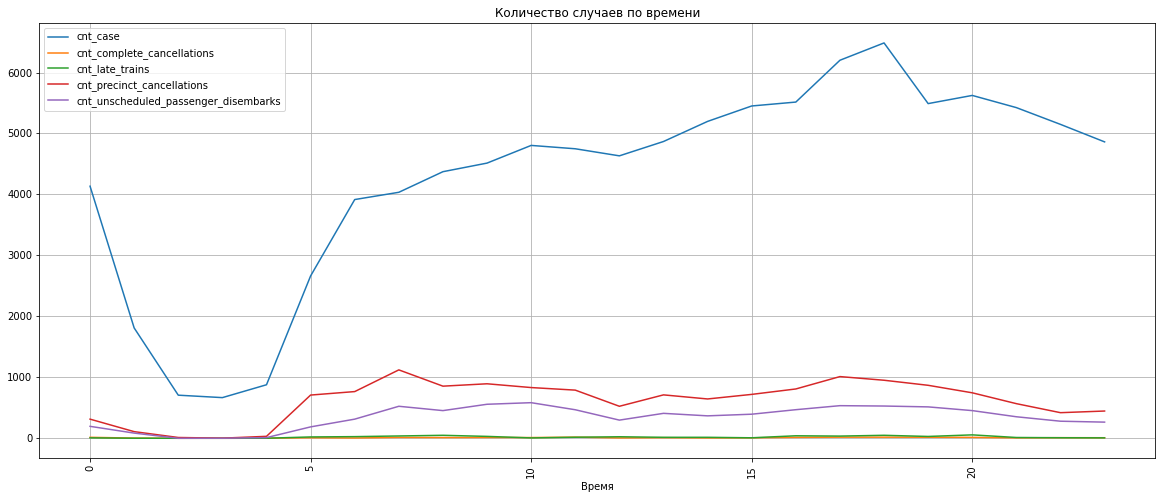

In [28]:
df_hour.pivot_table(
    index='hour', 
    values=['cnt_case', 'cnt_late_trains', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks'] 
).plot(figsize=(20, 8), grid=True)
plt.xlabel('Время')
plt.xticks(rotation=90)
plt.title('Количество случаев по времени')
plt.show()

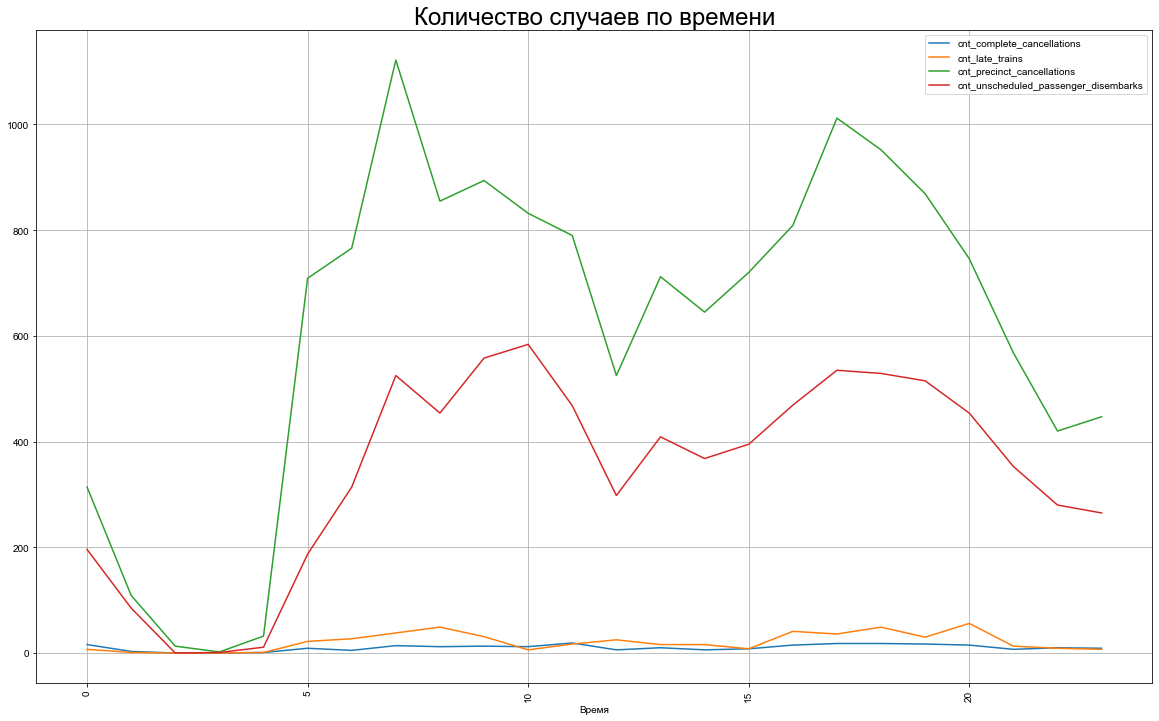

In [29]:
df_hour.pivot_table(
    index='hour', 
    values=['cnt_late_trains', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks'] 
).plot(figsize=(20, 12), grid=True)
plt.xlabel('Время')
sns.set(font_scale=2)
plt.xticks(rotation=90)
plt.title('Количество случаев по времени')
plt.show()

In [30]:
df_hour['cnt_complete_cancellations'].unique()

array([16,  3,  0,  1,  9,  5, 14, 12, 13, 19,  6, 10,  8, 15, 18, 17,  7],
      dtype=int64)

-----
* Количество полных отмен с полуночи до часу ночи, с 5 до 21 часа распределено равномерно и составляет не больше 20 случаев.  

* Количество опоздавших поездов больше с 5 до 10 часов, также с 15 до 21 часа.  

* Количество внеплановых высадок пассажиров увеличивается с 5 до 7 утра, с 8 до 10 часов, с 12 до 13 часов, с 14 до 17 часов, а снижается с 7 до 8 часов, с 10 до 12 часов, с 13 до 14 часов и после 17 часов равномерно идет на снижение.

* Количество участковых отмен с 5 до 7 утра, с 8 до 9 часов, с 12 до 13 часов, с 14 до 17 часов, а снижается с 7 до 8 часов, с 9 до 12 часов, с 13 до 14 часов и после 17 часов

----

In [31]:
#создаем сводную таблицу по дням недели случаев
df_day_of_week = data.pivot_table(index='day_of_week', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'sum', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'sum'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_day_of_week.columns = ['day_of_week', 'cnt_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']
df_day_of_week

,day_of_week,cnt_case,cnt_late_trains,cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,traffic_break_in_minutes
0,Friday,14496,128,665,31,2239,1235,736
1,Monday,15691,75,793,45,2365,1304,705
2,Saturday,14548,70,874,35,2418,1365,1005
3,Sunday,14600,80,912,50,2545,1361,791
4,Thursday,14263,80,667,36,2228,1214,731
5,Tuesday,14707,28,447,23,1619,932,642
6,Wednesday,13846,44,367,23,1449,842,385


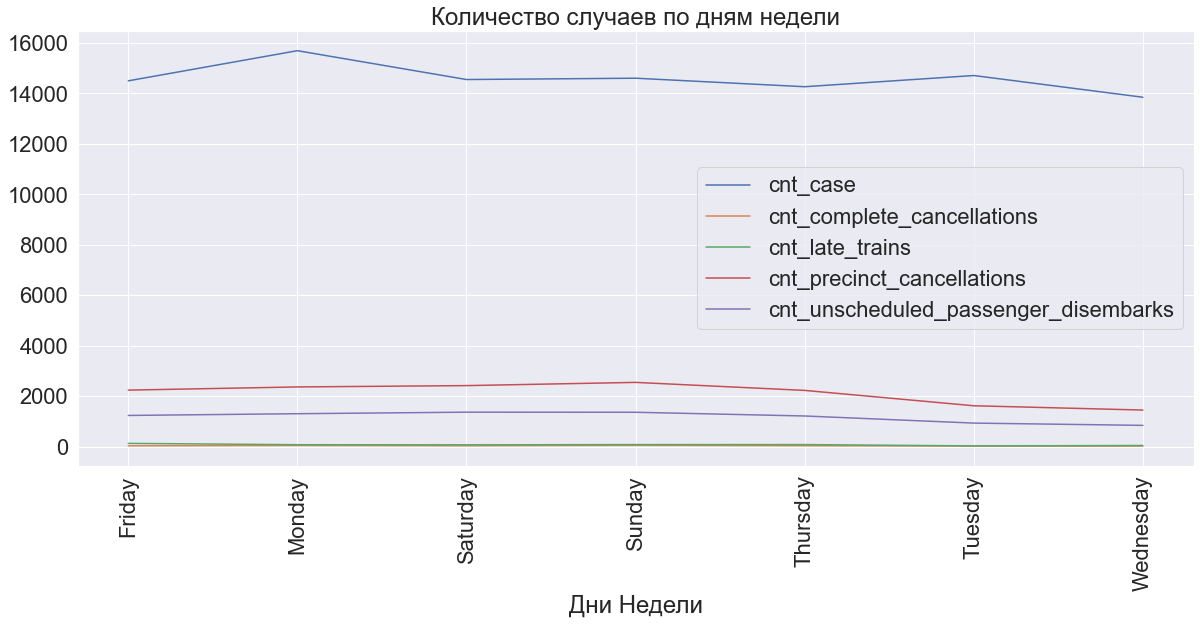

In [32]:
df_day_of_week.pivot_table(
    index='day_of_week', 
    values=['cnt_case', 'cnt_late_trains', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks'] 
).plot(figsize=(20, 8), grid=True)
plt.xlabel('Дни Недели')
plt.xticks(rotation=90)
plt.title('Количество случаев по дням недели')
plt.show()

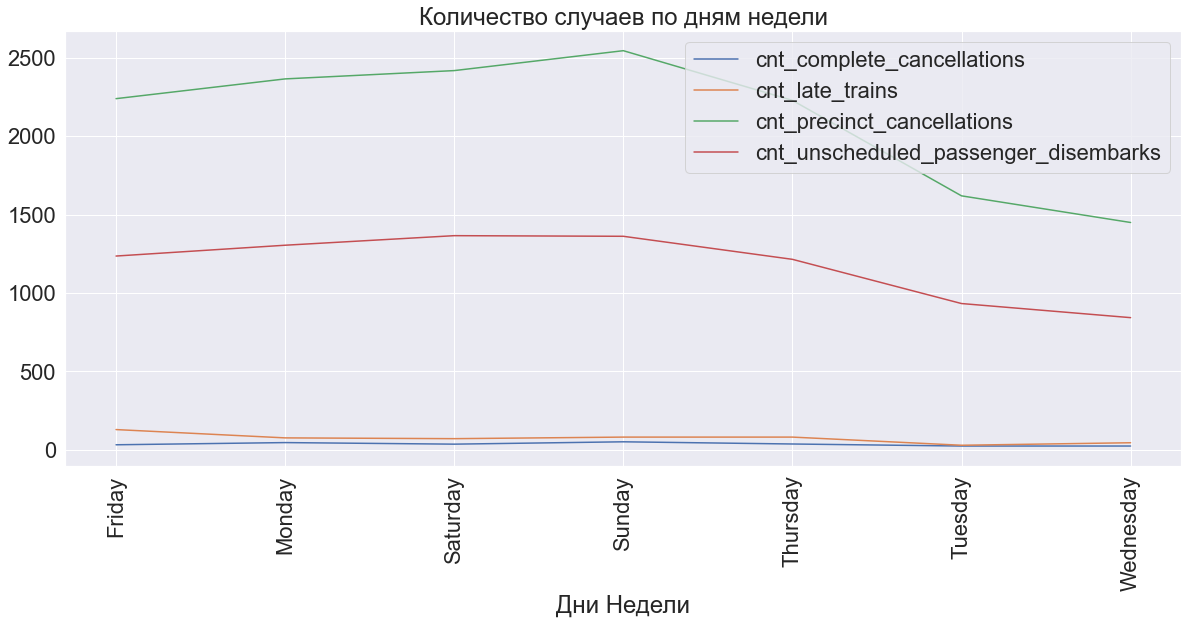

In [33]:
df_day_of_week.pivot_table(
    index='day_of_week', 
    values=['cnt_late_trains', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks'] 
).plot(figsize=(20, 8), grid=True)
plt.xlabel('Дни Недели')
sns.set(font_scale=2)
plt.xticks(rotation=90)
plt.title('Количество случаев по дням недели')
plt.show()

-----
* Участковые отмены чаще всего происходит по воскресеньям, реже всего по средам.

* Внеплановые высадки пассажиров чаще осуществляются по субботам и воскресеньям, реже осуществляются по вторникам и средам. 

* Поезда чаще опаздывают по пятницам, реже по вторникам и средам.

* Полные отмены осуществляются независимо от дня недели (распределение практически равномерное)

----

In [34]:
data['traffic_break_in_minutes'].unique()

array([  0,  48,  15,  40,  10,  13,  28,  29,  43,  19,  20,  16,  65,
        35,  23,  27,  12,  41,  18,  58,  24,  17,  25,  52,  38,  21,
        50,  51,  68,  31,  30,  60,  11,  56,  14,  54,  33,  49, 135,
         9,  36,  42,  22,  77,  26, 138,  32, 330], dtype=int64)

In [35]:
data['traffic_break_in_minutes'].value_counts()

0      101966
15         17
20         15
16         13
13         12
18         11
12          7
21          6
25          6
17          6
27          6
14          6
19          6
28          6
30          5
35          5
43          5
33          5
23          4
29          4
11          4
22          3
24          3
31          3
58          2
36          2
41          2
49          1
135         1
26          1
9           1
42          1
32          1
138         1
77          1
38          1
54          1
56          1
60          1
68          1
51          1
50          1
48          1
52          1
65          1
10          1
40          1
330         1
Name: traffic_break_in_minutes, dtype: int64

In [36]:
#убираем данные с нулевым значением в столбце перерывов в движении
df_traffic_break_in_minutes = data.query('1 < traffic_break_in_minutes')

Общая информация по столбцу "traffic_break_in_minutes":


count    185.000000
mean      27.000000
std       28.097269
min        9.000000
25%       15.000000
50%       20.000000
75%       30.000000
max      330.000000
Name: traffic_break_in_minutes, dtype: float64




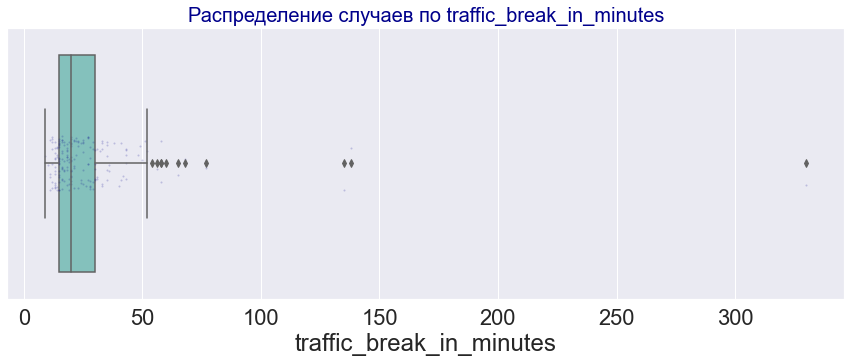

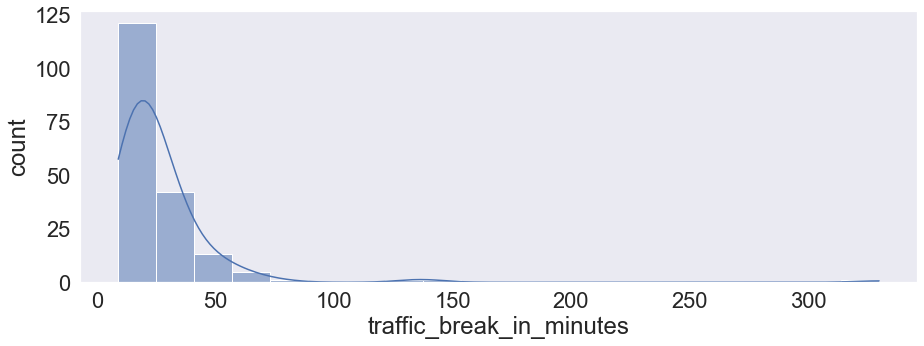

In [37]:
#исследуем описательную статистику перерывов в движении в минутах  
info_column_continuous(df_traffic_break_in_minutes['traffic_break_in_minutes'])
chart_column_continuous(df_traffic_break_in_minutes['traffic_break_in_minutes'])

----

* Перерыв в движении в основном осуществлялся продолжительностью до 20 минут. Чаще всего 15 минут. Был единичный случай максимального перерыва в движении 330 минут, который можем определить как выброс вместе с другими разовыми случаями.


* Средний перерыв в движении 0,05 минут.


* Медианное значение перерыва в движении 20 минут.
----

In [38]:
info_column_continuous(data['station_id'])

Общая информация по столбцу "station_id":


count     102151.0
unique       267.0
top           81.0
freq        5306.0
Name: station_id, dtype: float64




In [39]:
df_station_id = data.groupby('station_id').agg({'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'sum', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'sum'}).reset_index().round()
#df_station_id.apply(pd.to_numeric).style.background_gradient(cmap='GnBu', axis=0)
df_station_id.columns = ['station_id', 'cnt_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']
df_station_id

,station_id,cnt_case,cnt_late_trains,cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,traffic_break_in_minutes
0,1.0,619,0,0,0,25,16,0
1,2.0,495,1,24,2,44,24,33
2,3.0,309,0,0,0,31,25,16
3,4.0,73,0,0,0,23,17,0
4,5.0,1441,0,0,0,27,20,0
...,...,...,...,...,...,...,...,...
262,304.0,108,0,0,0,2,1,0
263,305.0,60,0,0,0,1,1,0
264,306.0,112,0,0,0,2,1,0
265,307.0,129,0,0,0,7,3,0


In [40]:
info_column_continuous(df_station_id['cnt_case'])

Общая информация по столбцу "cnt_case":


count     267.000000
mean      382.588015
std       503.629185
min        17.000000
25%       125.500000
50%       254.000000
75%       457.500000
max      5306.000000
Name: cnt_case, dtype: float64




In [41]:
mean_cnt_case = df_station_id['cnt_case'].mean()

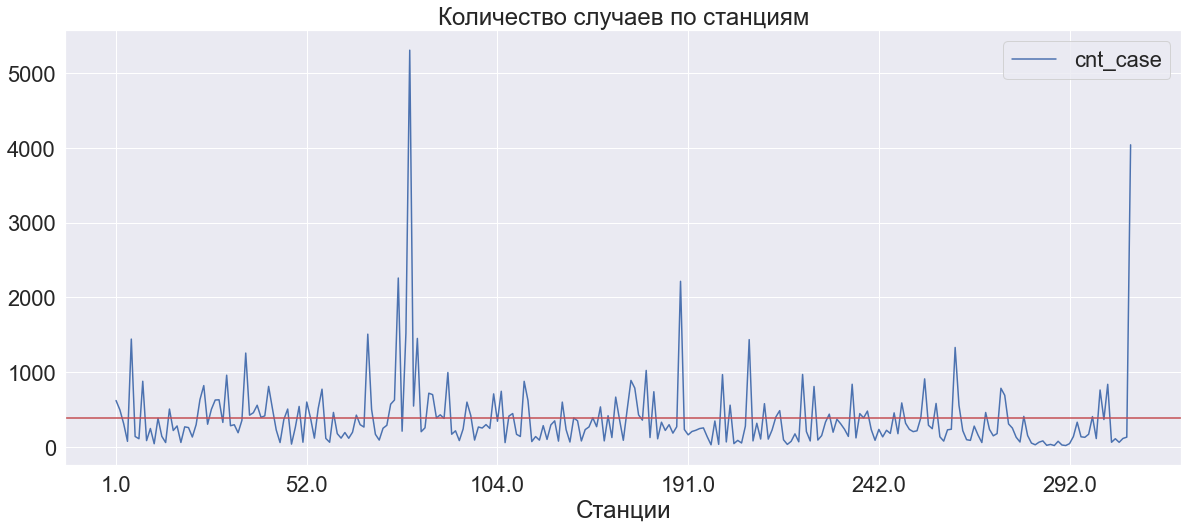

In [42]:
df_station_id.pivot_table(
    index='station_id', 
    values='cnt_case' 
).plot(figsize=(20, 8), grid=True)
plt.xlabel('Станции')
plt.axhline(y=mean_cnt_case, color='r') #выделяем среднее количество случаев по станциям
plt.title('Количество случаев по станциям')
plt.show()

----
Из графика видим, что во многих станциях количество случаев выше среднего. Опреляем какие это станции.

----

In [43]:
#проверяем на каких станциях больше всего случаев
df_top_station_id = data['station_id'].value_counts().head(10)
df_top_station_id.columns = ['station_id', 'cnt_case']
df_top_station_id

81.0     5306
0        4040
78.0     2258
189.0    2214
80.0     1521
68.0     1507
83.0     1450
5.0      1441
207.0    1434
262.0    1329
Name: station_id, dtype: int64

Данные без id станции не учитываем, т.к. эти нарушения произошли во время перегона. Больше всего случаев выявлено на станциях 81.0, 78.0, 189.0, 80.0, 68.0

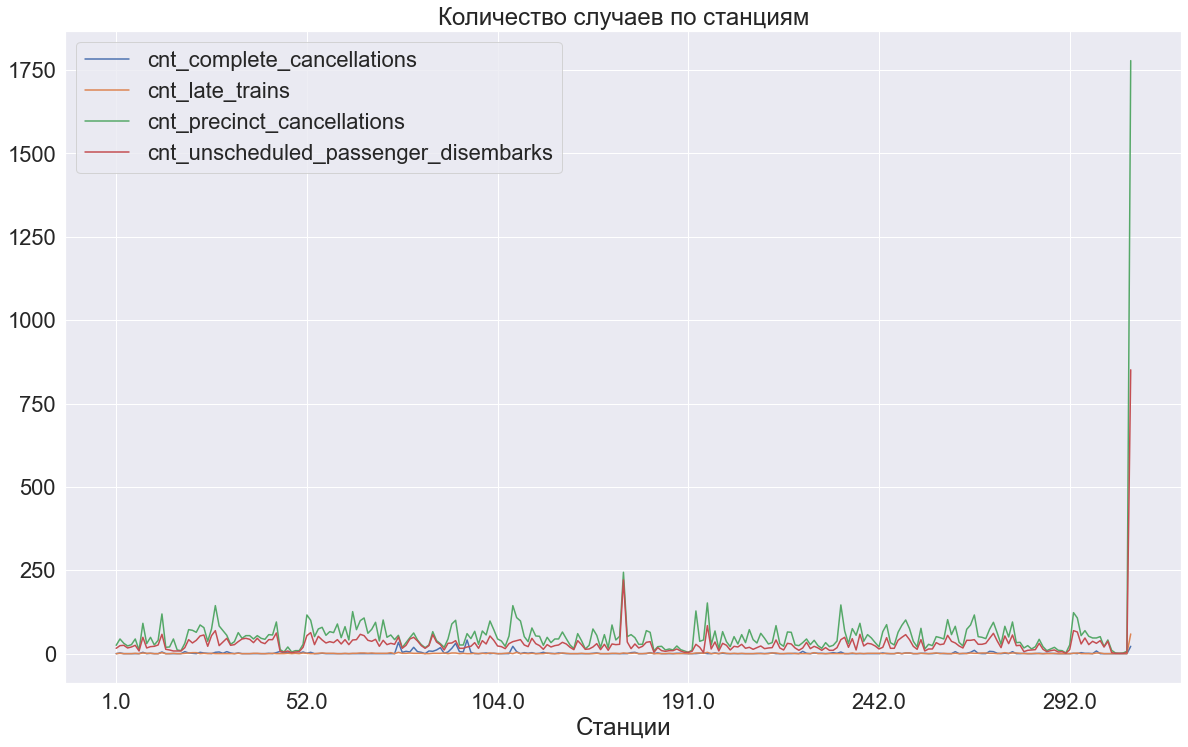

In [44]:
df_station_id.pivot_table(
    index='station_id', 
    values=['cnt_late_trains', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks'] 
).plot(figsize=(20, 12), grid=True)
plt.xlabel('Станции')
plt.title('Количество случаев по станциям')
plt.show()

In [45]:
df_station_id['cnt_complete_cancellations'].unique()

array([ 0,  2,  4,  1,  5,  6,  3,  7, 34, 19,  8, 11, 18, 16, 31, 41, 22,
       10], dtype=int64)

In [46]:
#исследуем описательную статистику опозданий поездов по станциям  
info_column_continuous(df_station_id['cnt_late_trains'])

#исследуем описательную статистику опозданий поездов по станциям  
info_column_continuous(df_station_id['cnt_late_minutes'])

#исследуем описательную статистику полных отмен по станциям  
info_column_continuous(df_station_id['cnt_complete_cancellations'])

#исследуем описательную статистику участковых отмен по станциям  
info_column_continuous(df_station_id['cnt_precinct_cancellations'])

#исследуем описательную статистику внеплановых высадок пассажиров по станциям  
info_column_continuous(df_station_id['cnt_unscheduled_passenger_disembarks'])

Общая информация по столбцу "cnt_late_trains":


count    267.000000
mean       0.910112
std        3.674666
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       59.000000
Name: cnt_late_trains, dtype: float64


Общая информация по столбцу "cnt_late_minutes":


count     267.000000
mean       17.696629
std        71.785301
min         0.000000
25%         0.000000
50%         0.000000
75%        21.500000
max      1104.000000
Name: cnt_late_minutes, dtype: float64


Общая информация по столбцу "cnt_complete_cancellations":


count    267.000000
mean       1.891386
std        4.814550
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       41.000000
Name: cnt_complete_cancellations, dtype: float64


Общая информация по столбцу "cnt_precinct_cancellations":


count     267.000000
mean       55.666667
std       110.618210
min         1.000000
25%        26.000000
50%        44.000000
75%        66.000000
max      1778.

-----

* Нарушения происходили в 267 станциях.  

* Основное количество случаев пришлось на станцию 81.0 (максимальное количество нарушений 5306 ед.)

* Среднее количество случаев по станциям 382 ед. 

* Медианное количество случаев по станциям 254 ед.

* Минимальное количество случаев по станциям 17 ед.

* Больше всего случаев выявлено на станциях 81.0, 78.0, 189.0, 80.0, 68.0

* За весь период исследования по станциям в среднем опаздывает 1 поезд, максимальное количество опоздавших поездов по станциям 59 ед.  

* В среднем по станциям общее количество минут опоздания поездов составляет 17,7 минут.  

* Среднее количество полных отмен по станциям 2 ед, максимальное - 41 отмена.  

* Среднее количество участковых отмен по станциям 55 ед., медианное значение по количеству участковых отмен составляет 44 ед., максимальное количество участковых отмен по станциям 1778 ед. 

* Среднее количество внеплановых высадок пассажиров 30 случаев, медианное - 26 случаев, максимальное - 851 случай.

-----

In [47]:
df_station_track = data.groupby('station_track').agg({'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'sum', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'sum'}).reset_index().round()
df_station_track.columns = ['station_track', 'cnt_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']
df_station_track

,station_track,cnt_case,cnt_late_trains,cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,traffic_break_in_minutes
0,,88634,61,1157,25,2019,963,918
1,1 станционный путь,104,0,0,6,30,3,0
2,2 станционный путь,143,0,0,4,59,3,0
3,3 станционный путь,637,3,41,42,463,63,153
4,4 станционный путь,379,0,0,13,328,42,13
5,I главный станционный путь,6211,97,1714,184,5858,3427,1889
6,II главный станционный путь,6001,82,1813,231,6100,3749,2022
7,III главный станционный путь,42,0,0,0,6,3,0


In [48]:
#убираем данные без указания станционного пути, чтобы увидеть распределение по станционным путям,
# т.к. количество случаев без указания станционного пути значительно больше
df_station_track = df_station_track.query('station_track !=""')
df_station_track

,station_track,cnt_case,cnt_late_trains,cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,traffic_break_in_minutes
1,1 станционный путь,104,0,0,6,30,3,0
2,2 станционный путь,143,0,0,4,59,3,0
3,3 станционный путь,637,3,41,42,463,63,153
4,4 станционный путь,379,0,0,13,328,42,13
5,I главный станционный путь,6211,97,1714,184,5858,3427,1889
6,II главный станционный путь,6001,82,1813,231,6100,3749,2022
7,III главный станционный путь,42,0,0,0,6,3,0


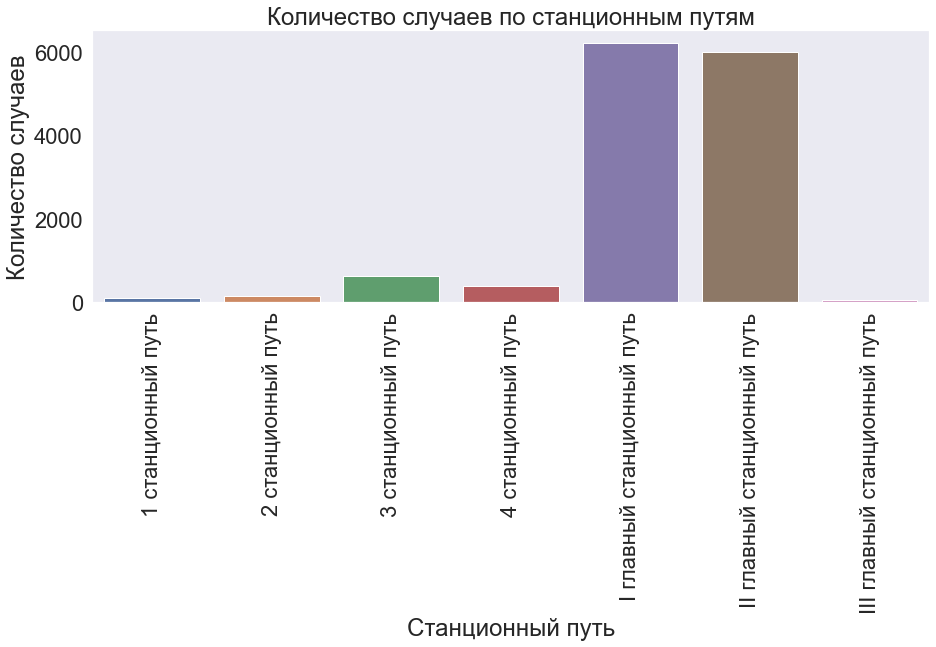

In [49]:
ax = sns.barplot(x='station_track',
            y='cnt_case',
            data=df_station_track   
)
plt.gcf().set_size_inches(15,5)
sns.set(font_scale=2)
plt.xticks(rotation=90)
ax.set_title('Количество случаев по станционным путям')
ax.set(xlabel='Станционный путь', ylabel='Количество случаев');

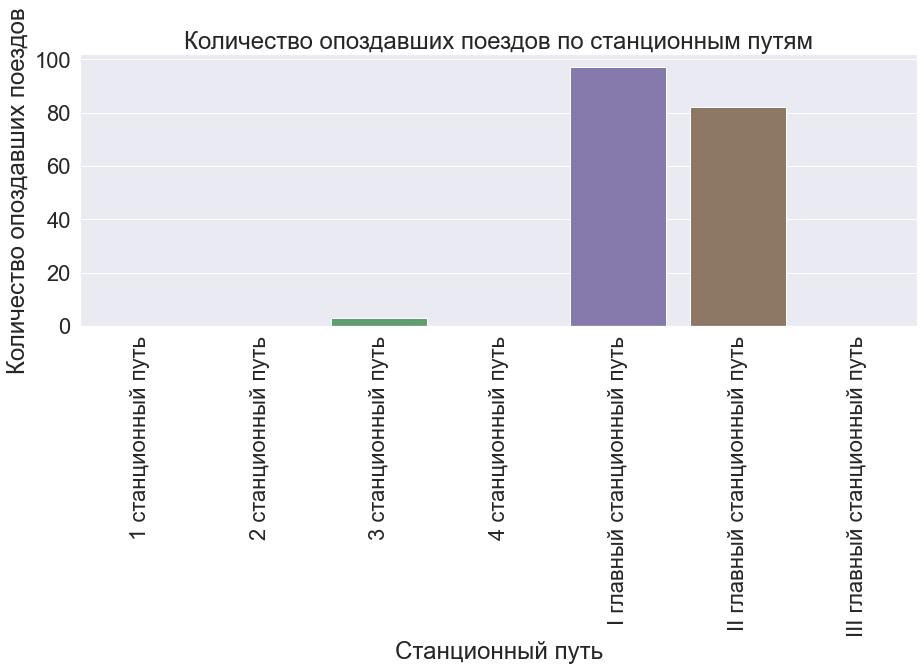

In [50]:
ax = sns.barplot(x='station_track',
            y='cnt_late_trains',
            data=df_station_track   
)
plt.gcf().set_size_inches(15,5)
sns.set(font_scale=2)
plt.xticks(rotation=90)
ax.set_title('Количество опоздавших поездов по станционным путям')
ax.set(xlabel='Станционный путь', ylabel='Количество опоздавших поездов');

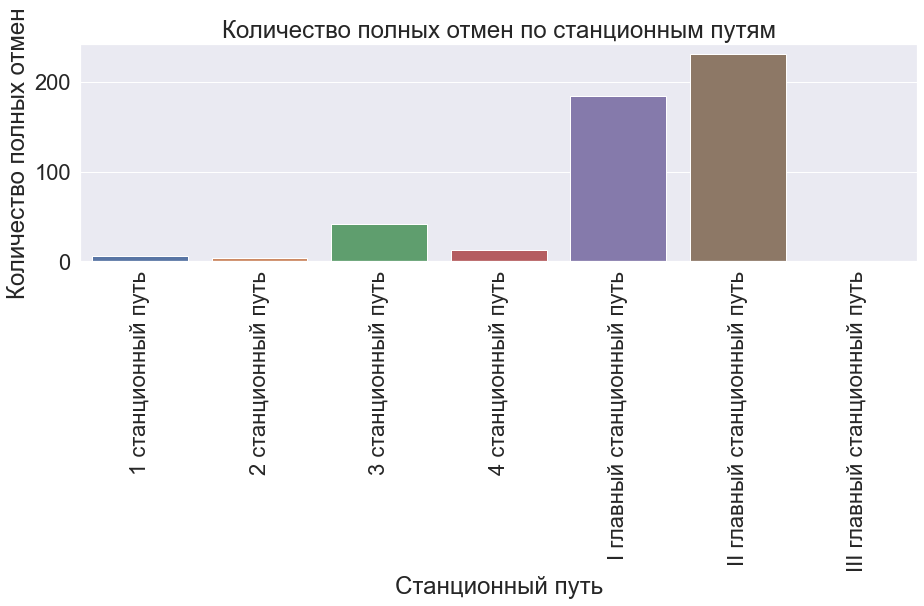

In [51]:
ax = sns.barplot(x='station_track',
            y='cnt_complete_cancellations',
            data=df_station_track   
)
plt.gcf().set_size_inches(15,4)
sns.set(font_scale=2)
plt.xticks(rotation=90)
ax.set_title('Количество полных отмен по станционным путям')
ax.set(xlabel='Станционный путь', ylabel='Количество полных отмен');

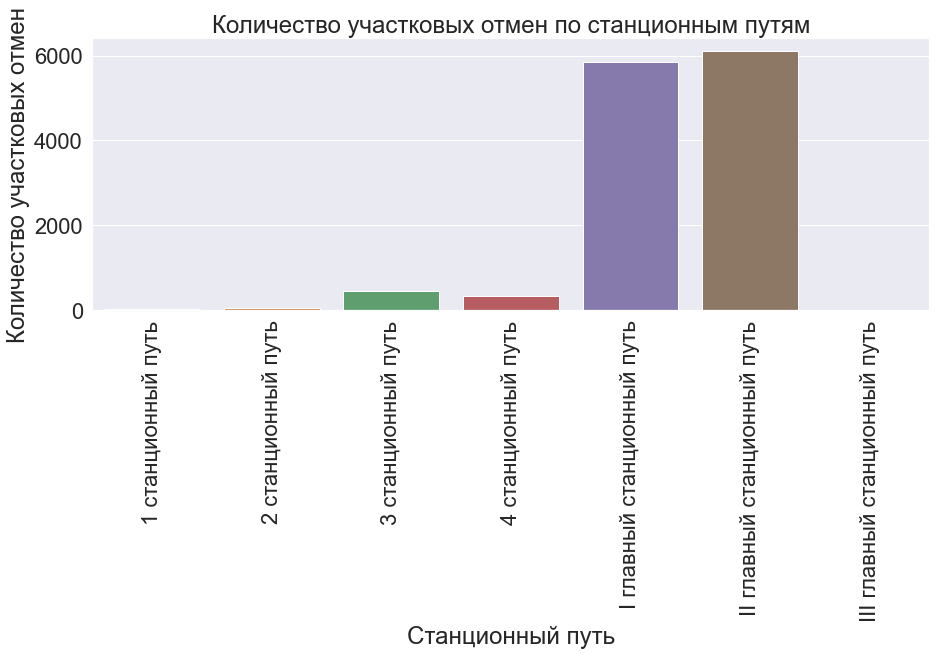

In [52]:
ax = sns.barplot(x='station_track',
            y='cnt_precinct_cancellations',
            data=df_station_track   
)
plt.gcf().set_size_inches(15,5)
sns.set(font_scale=2)
plt.xticks(rotation=90)
ax.set_title('Количество участковых отмен по станционным путям')
ax.set(xlabel='Станционный путь', ylabel='Количество участковых отмен');

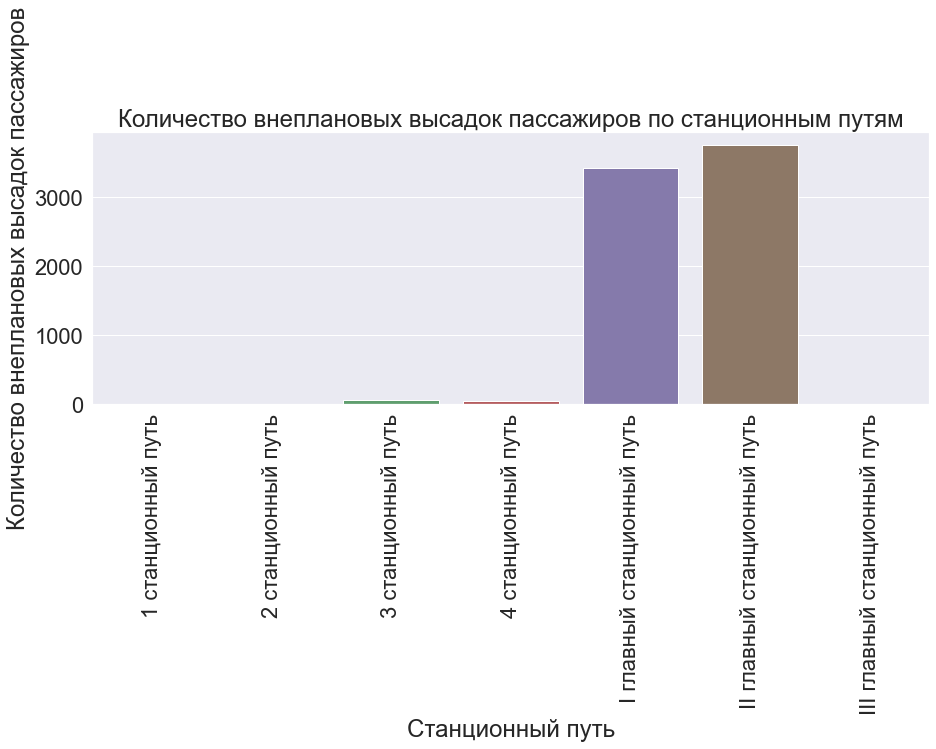

In [53]:
ax = sns.barplot(x='station_track',
            y='cnt_unscheduled_passenger_disembarks',
            data=df_station_track   
)
plt.gcf().set_size_inches(15,5)
sns.set(font_scale=2)
plt.xticks(rotation=90)
ax.set_title('Количество внеплановых высадок пассажиров по станционным путям')
ax.set(xlabel='Станционный путь', ylabel='Количество внеплановых высадок пассажиров');

-----
Основное количество случаев, участковых отмен и внеплановых высадок приходится на I и II главные станционные пути.

-----

In [54]:
df_line = data.pivot_table(index='line', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'sum', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'sum'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_line.columns = ['line', 'cnt_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']
df_line

,line,cnt_case,cnt_late_trains,cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,traffic_break_in_minutes
0,Арбатско-покровская,7406,21,454,21,1062,601,518
1,Большая кольцевая,14882,56,413,21,2170,1428,479
2,Бутовская,1896,23,70,6,96,53,44
3,Замоскворецкая,9214,6,703,36,2097,1084,612
4,Калининская,3172,111,107,9,425,194,70
5,Калужско-рижская,7940,50,335,23,1607,789,355
6,Кольцевая,14166,127,391,19,517,433,346
7,Люблинско-дмитровская,9192,14,641,20,1338,807,613
8,Некрасовская,5092,4,26,2,156,99,37
9,Серпуховско-тимирязевская,8355,16,402,22,1556,814,662


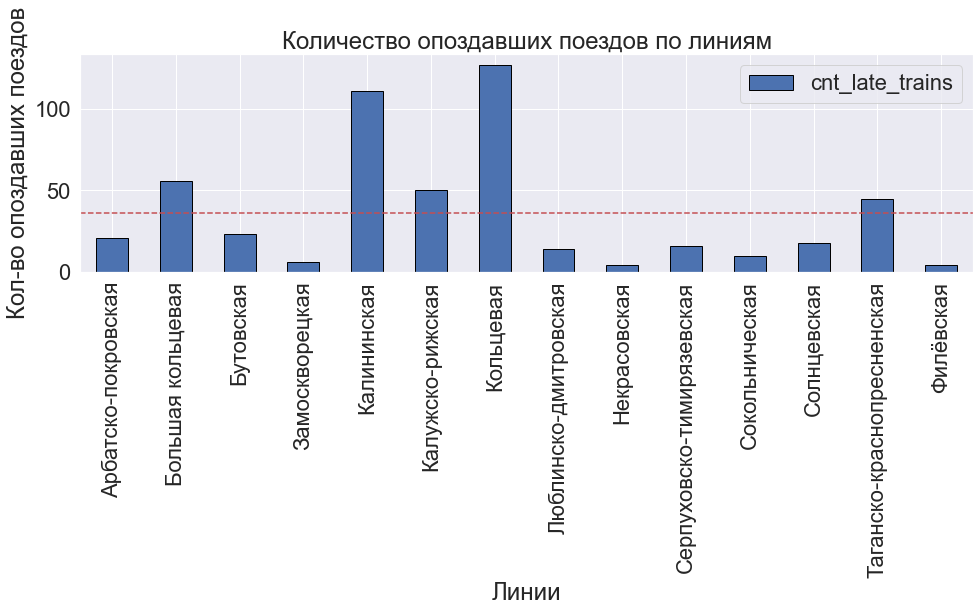

In [55]:
df_line.plot(x = 'line', y = 'cnt_late_trains', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = df_line['cnt_late_trains'].mean(), color = 'r', linestyle = '--')
plt.title('Количество опоздавших поездов по линиям')
plt.xlabel('Линии')
plt.ylabel('Кол-во опоздавших поездов')
plt.show();

-----
Количество опоздавших поездов выше среднего значения по Большой кольцевой, Калининской, Калужско-Рижской, Кольцевой, Таганско-Карснопресненской линиях.

----

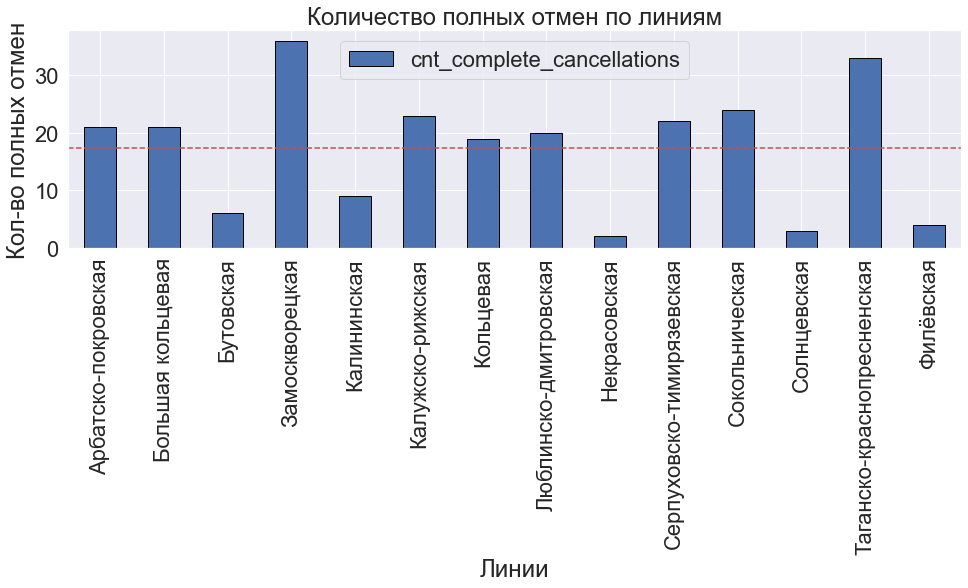

In [56]:
df_line.plot(x = 'line', y = 'cnt_complete_cancellations', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = df_line['cnt_complete_cancellations'].mean(), color = 'r', linestyle = '--')
plt.title('Количество полных отмен по линиям')
plt.xlabel('Линии')
plt.ylabel('Кол-во полных отмен')
plt.show();

----- 
Количество полных отмен  ниже среднего по Бутовской, Калининской, Некрасовской, Солнцевской, Филевской линиях, по остальным линиям выше среднего (т.е. по Арбатско-Покровской, Большой кольцевой, Калужско-Рижской, Кольцевой, Люблинско-Дмитровской, Серпуховско-Тимирязевской, Сокольнической). Количество полных отмен значительно выше среднего на Замоскворецской Таганско-Краснопресненской линиях. 

----

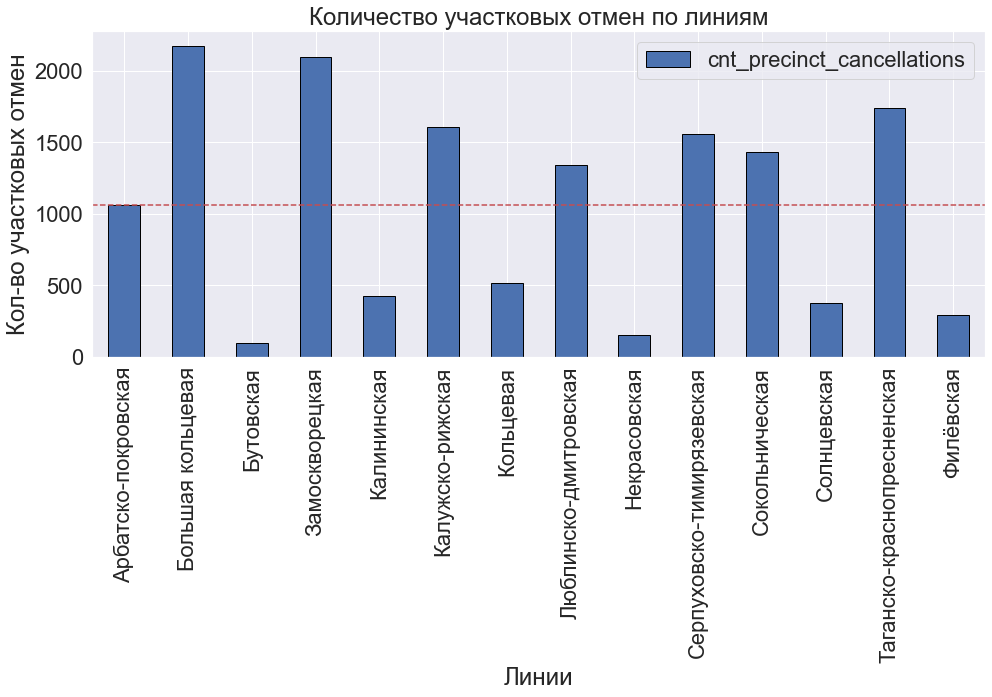

In [57]:
df_line.plot(x = 'line', y = 'cnt_precinct_cancellations', kind = 'bar', figsize=(16, 6), edgecolor = 'black')
plt.axhline(y = df_line['cnt_precinct_cancellations'].mean(), color = 'r', linestyle = '--')
plt.title('Количество участковых отмен по линиям')
plt.xlabel('Линии')
plt.ylabel('Кол-во участковых отмен')
plt.show();

----
Количество участковых отмен почти в 2 раза выше среднего на Большой кольцевой и Замоскворецской линиях. Меньше всего участковых отмен на Бутовской, Некрасовской линиях.

----

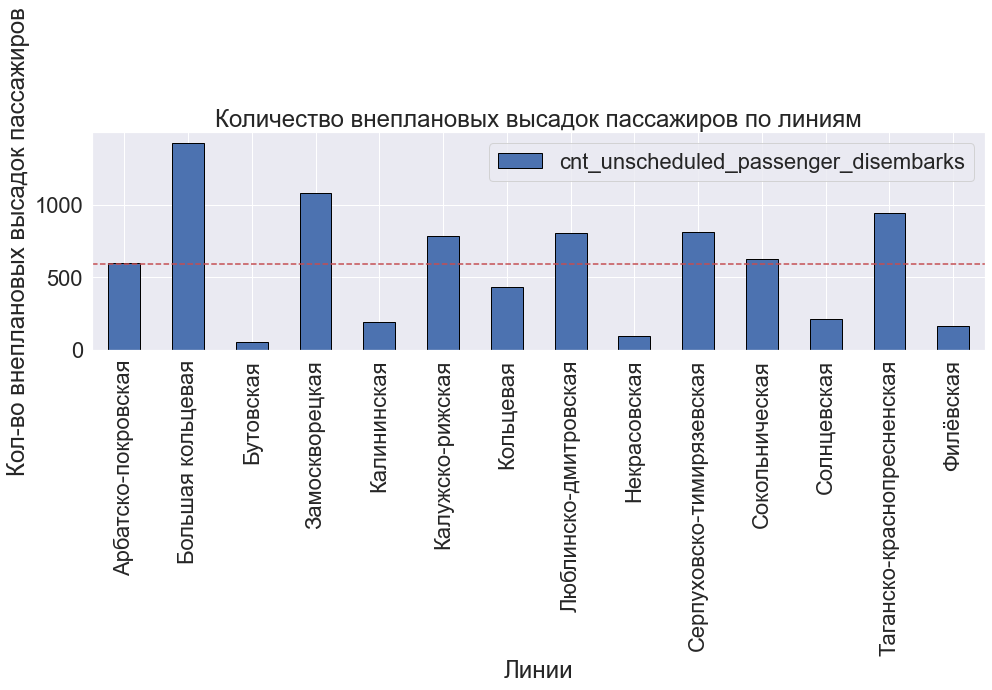

In [58]:
df_line.plot(x = 'line', y = 'cnt_unscheduled_passenger_disembarks', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = df_line['cnt_unscheduled_passenger_disembarks'].mean(), color = 'r', linestyle = '--')
plt.title('Количество внеплановых высадок пассажиров по линиям')
plt.xlabel('Линии')
plt.ylabel('Кол-во внеплановых высадок пассажиров')
plt.show();

-----
Количество внеплановых высадок пассажиров значительно выше среднего значения на Большой кольцевой, Замоскворецской и Таганско-Краснопресненской линиях. Внеплановых высадок пассажиров меньше всего осуществлялось на Бутовской и Некрасовской линиях.

-----

In [59]:
df_responsible_service = data.pivot_table(index='responsible_service', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'mean', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'mean'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_responsible_service.columns = ['responsible_service', 'cnt_case', 'cnt_late_trains', 'mean_cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'mean_traffic_break_in_minutes']
df_responsible_service

,responsible_service,cnt_case,cnt_late_trains,mean_cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,mean_traffic_break_in_minutes
0,Б,7240,118,0.0,119,3260,2153,0.0
1,ДИТС,4669,1,0.0,0,1,1,0.0
2,П,476,10,1.0,12,341,207,1.0
3,СПО,1505,0,0.0,0,48,27,0.0
4,Т,7827,374,0.0,95,10087,5373,0.0
5,Ш,1946,2,0.0,9,870,362,0.0
6,Э,4457,0,0.0,8,222,116,0.0
7,ЭМ,553,0,0.0,0,34,14,0.0
8,ЭС,73478,0,0.0,0,0,0,0.0


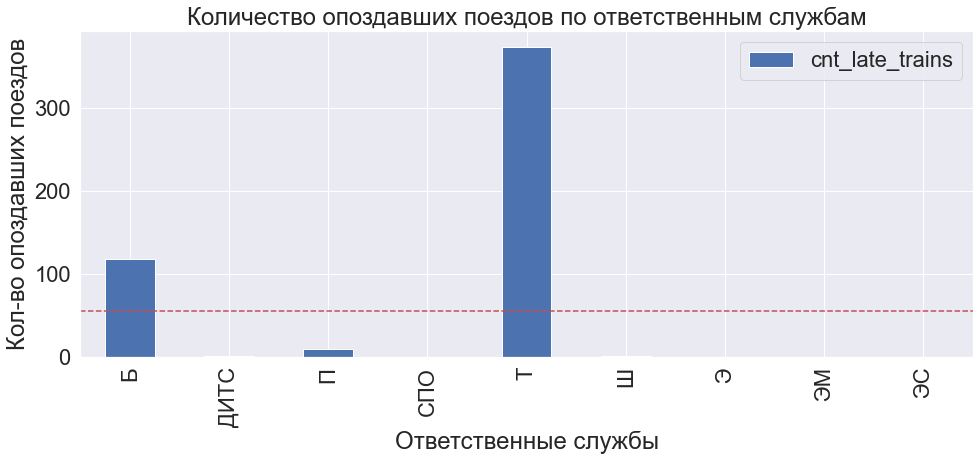

In [60]:
df_responsible_service.plot(x = 'responsible_service', y = 'cnt_late_trains', kind = 'bar', figsize=(16, 6))
plt.axhline(y = df_responsible_service['cnt_late_trains'].mean(), color = 'r', linestyle = '--')
plt.title('Количество опоздавших поездов по ответственным службам')
plt.xlabel('Ответственные службы')
plt.ylabel('Кол-во опоздавших поездов')
plt.show();

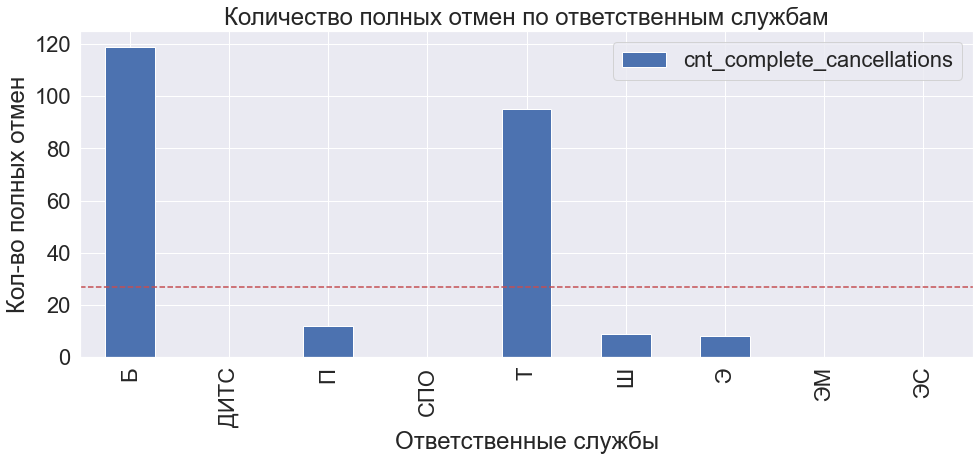

In [61]:
df_responsible_service.plot(x = 'responsible_service', y = 'cnt_complete_cancellations', kind = 'bar', figsize=(16, 6))
plt.axhline(y = df_responsible_service['cnt_complete_cancellations'].mean(), color = 'r', linestyle = '--')
plt.title('Количество полных отмен по ответственным службам')
plt.xlabel('Ответственные службы')
plt.ylabel('Кол-во полных отмен')
plt.show();

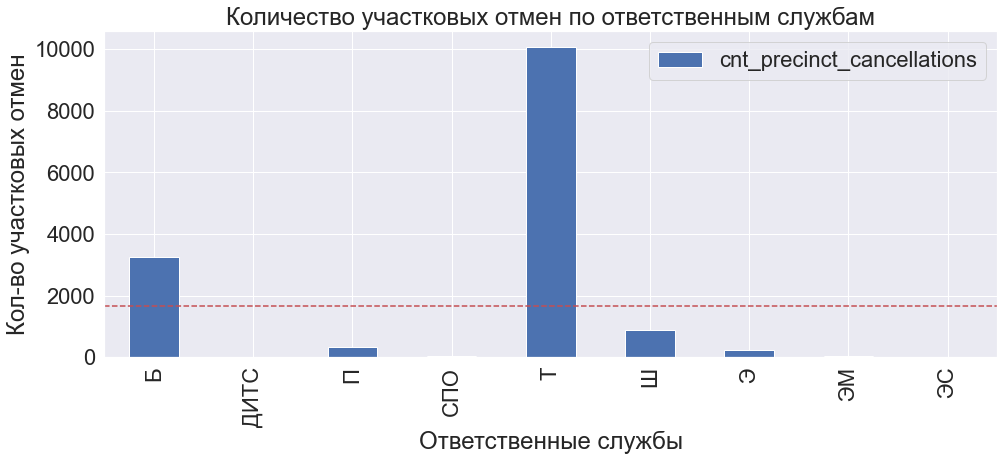

In [62]:
df_responsible_service.plot(x = 'responsible_service', y = 'cnt_precinct_cancellations', kind = 'bar', figsize=(16, 6))
plt.axhline(y = df_responsible_service['cnt_precinct_cancellations'].mean(), color = 'r', linestyle = '--')
plt.title('Количество участковых отмен по ответственным службам')
plt.xlabel('Ответственные службы')
plt.ylabel('Кол-во участковых отмен')
plt.show();

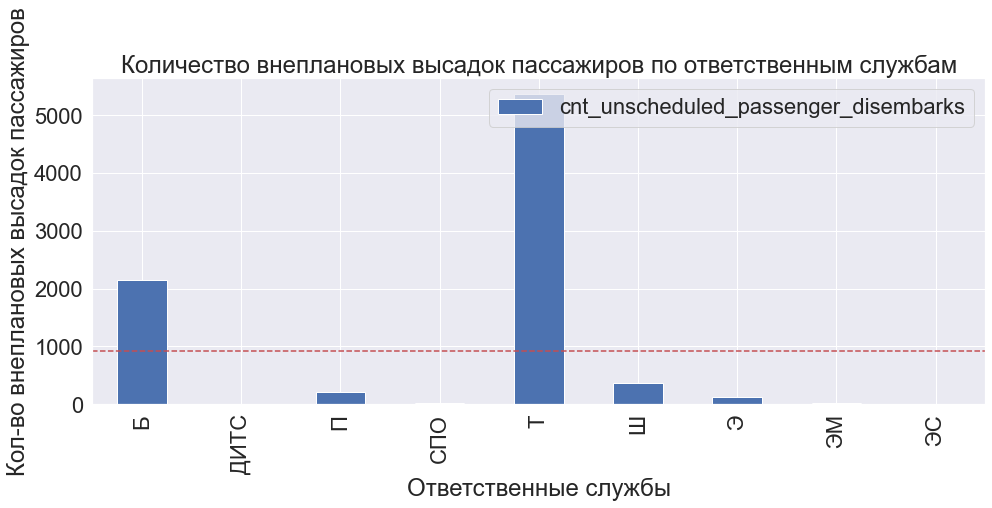

In [63]:
df_responsible_service.plot(x = 'responsible_service', y = 'cnt_unscheduled_passenger_disembarks', kind = 'bar', figsize=(16, 6))
plt.axhline(y = df_responsible_service['cnt_unscheduled_passenger_disembarks'].mean(), color = 'r', linestyle = '--')
plt.title('Количество внеплановых высадок пассажиров по ответственным службам')
plt.xlabel('Ответственные службы')
plt.ylabel('Кол-во внеплановых высадок пассажиров')
plt.show();

-----
Основное количество опоздавших поездов, полных отмен, участковых отмен, внеплановых высадок пассажиров приходится на службу безопасности и службуа подвижного состава.

----

In [64]:
df_common_cause = data.pivot_table(index='common_cause', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'mean', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'mean'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_common_cause.columns = ['common_cause', 'cnt_case', 'cnt_late_trains', 'mean_cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'mean_traffic_break_in_minutes']
df_common_cause

,common_cause,cnt_case,cnt_late_trains,mean_cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,mean_traffic_break_in_minutes
0,Воздействие внешних факторов (метеорологически...,1102,1,0.0,2,114,65,0.0
1,Действия внешних организаций,3703,10,0.0,10,304,194,0.0
2,Действия пассажиров,73994,150,0.0,121,4314,2723,0.0
3,Действия работников метрополитена,672,5,1.0,29,775,458,1.0
4,Неисправность не подтвердилась/устройства отра...,7549,4,0.0,2,198,118,0.0
5,Отказ/неисправность технических средств,15131,335,0.0,79,9158,4695,0.0


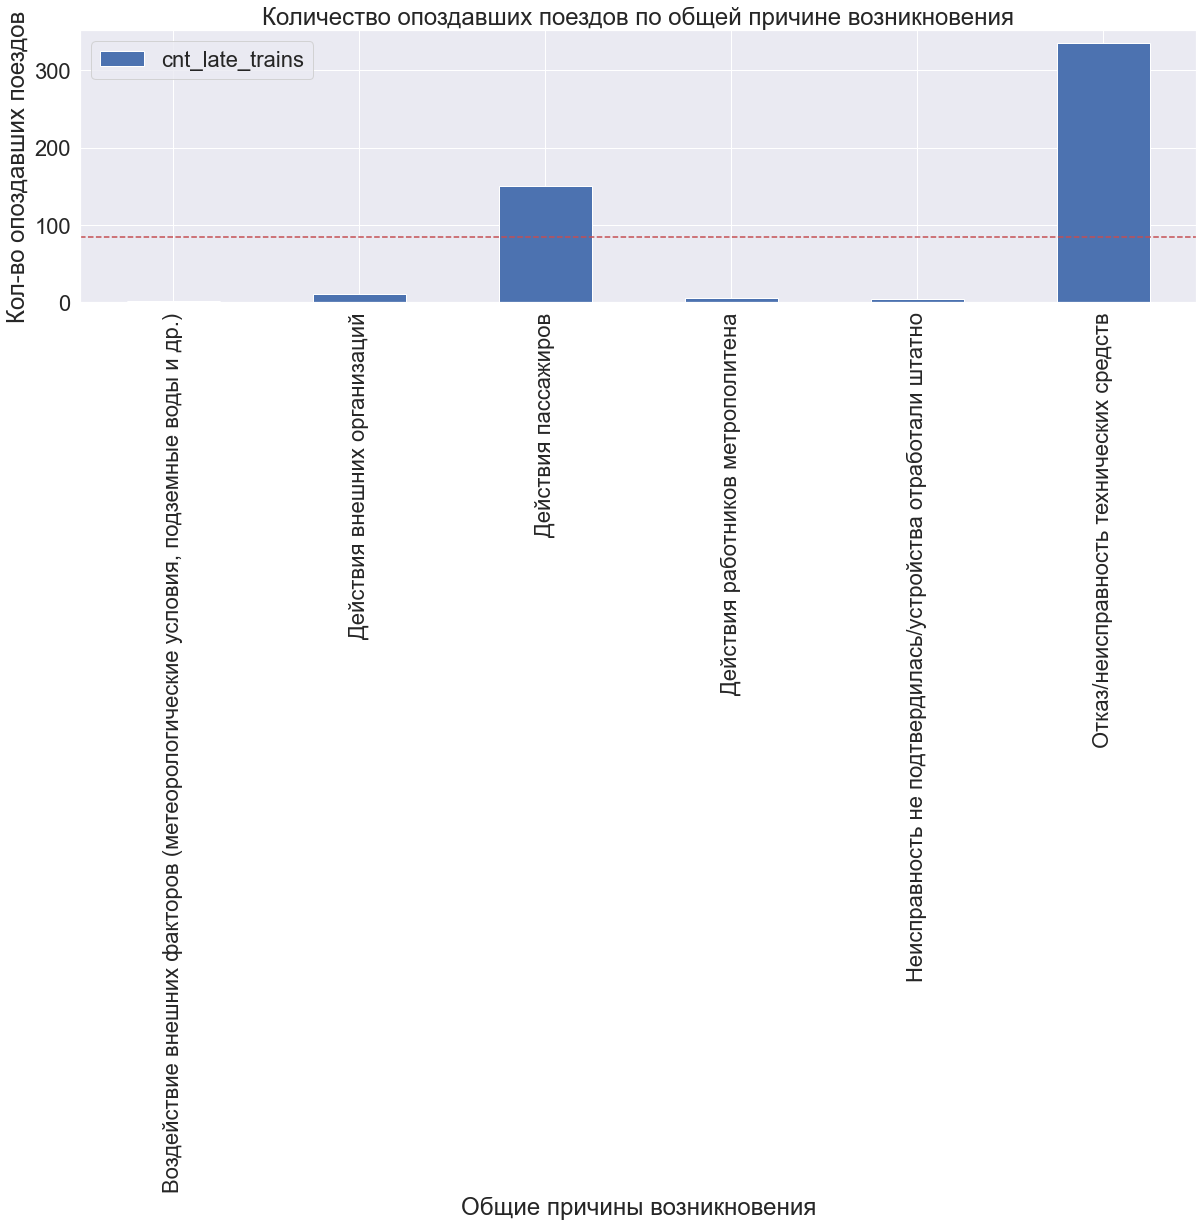

In [65]:
df_common_cause.plot(x = 'common_cause', y = 'cnt_late_trains', kind = 'bar', figsize=(20, 5))
plt.axhline(y = df_common_cause['cnt_late_trains'].mean(), color = 'r', linestyle = '--')
plt.title('Количество опоздавших поездов по общей причине возникновения')
plt.xlabel('Общие причины возникновения')
plt.ylabel('Кол-во опоздавших поездов')
plt.show();

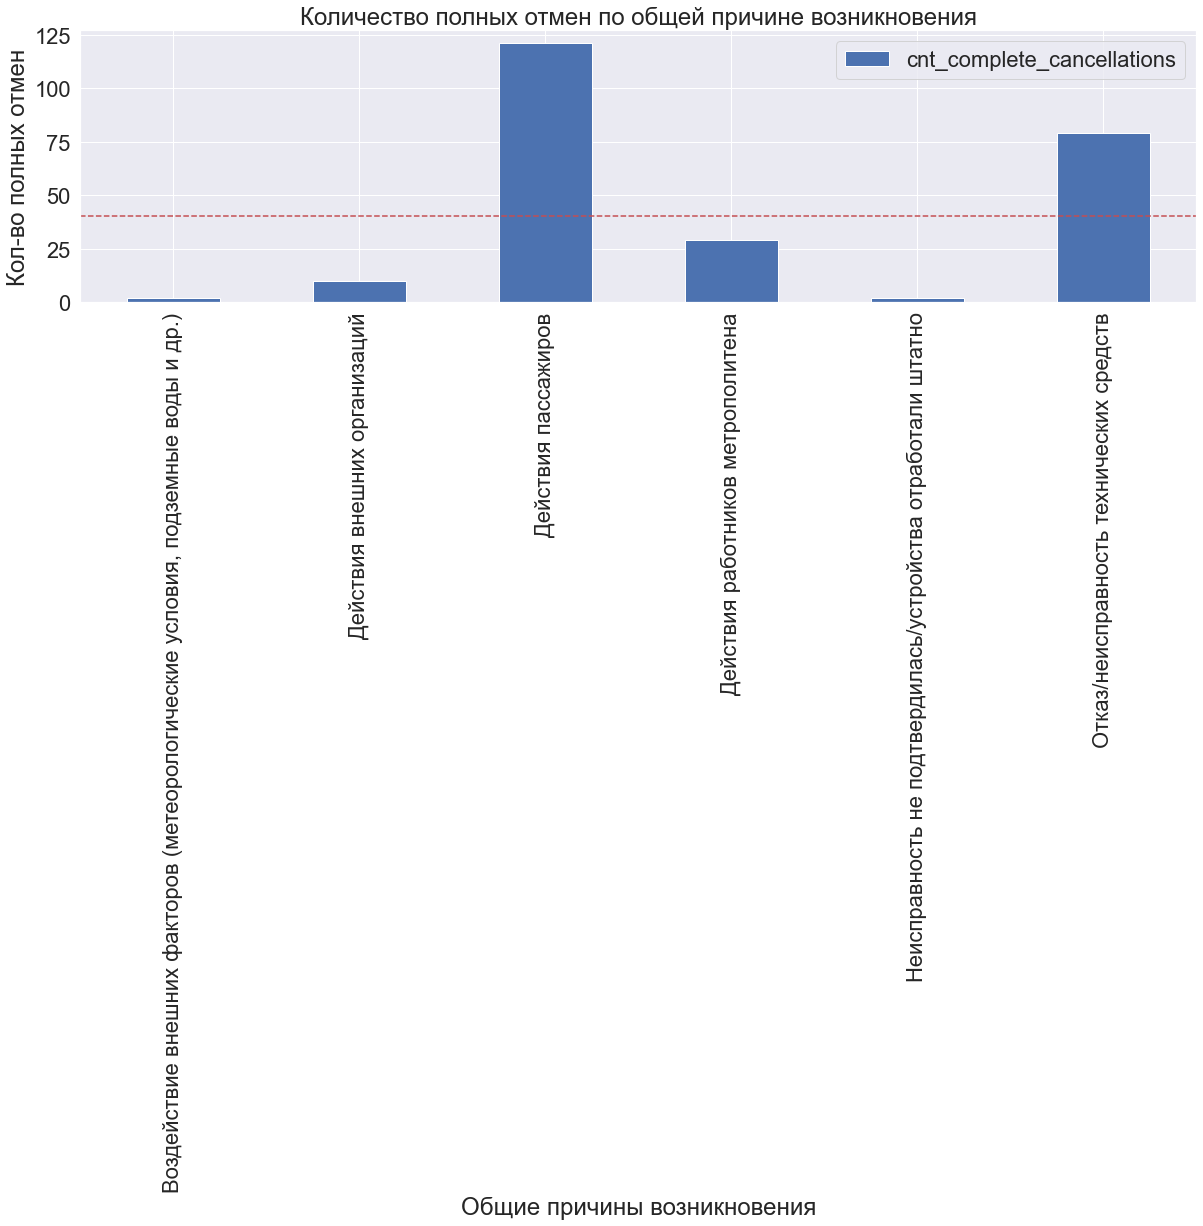

In [66]:
df_common_cause.plot(x = 'common_cause', y = 'cnt_complete_cancellations', kind = 'bar', figsize=(20,5))
plt.axhline(y = df_common_cause['cnt_complete_cancellations'].mean(), color = 'r', linestyle = '--')
plt.title('Количество полных отмен по общей причине возникновения')
plt.xlabel('Общие причины возникновения')
plt.ylabel('Кол-во полных отмен')
plt.show();

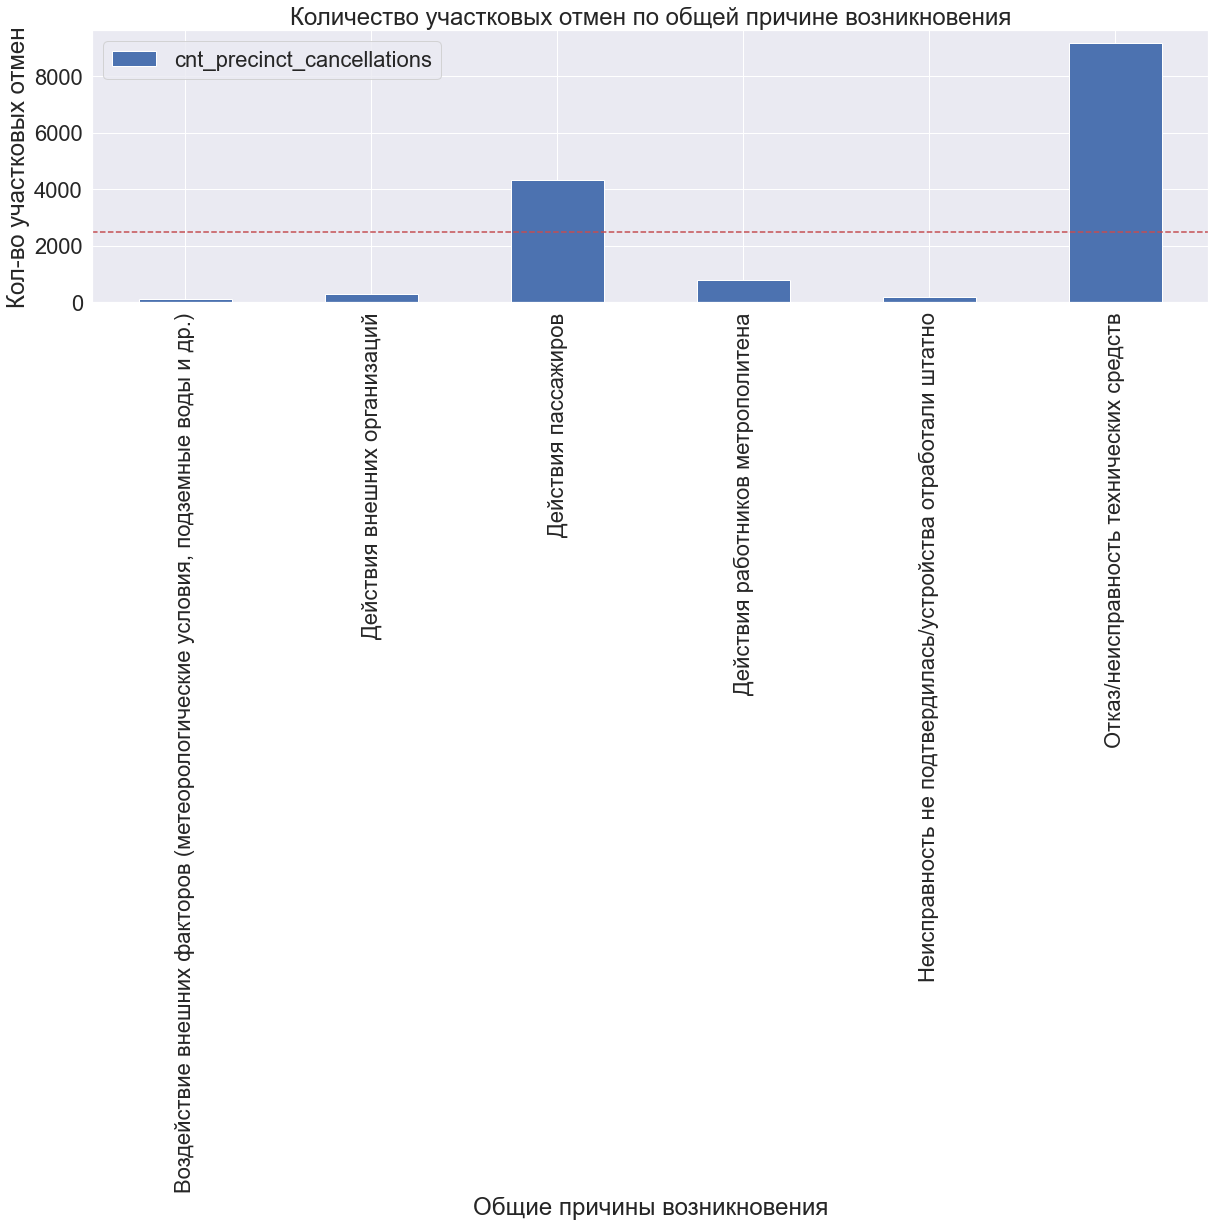

In [67]:
df_common_cause.plot(x = 'common_cause', y = 'cnt_precinct_cancellations', kind = 'bar', figsize=(20,5))
plt.axhline(y = df_common_cause['cnt_precinct_cancellations'].mean(), color = 'r', linestyle = '--')
plt.title('Количество участковых отмен по общей причине возникновения')
plt.xlabel('Общие причины возникновения')
plt.ylabel('Кол-во участковых отмен')
plt.show();

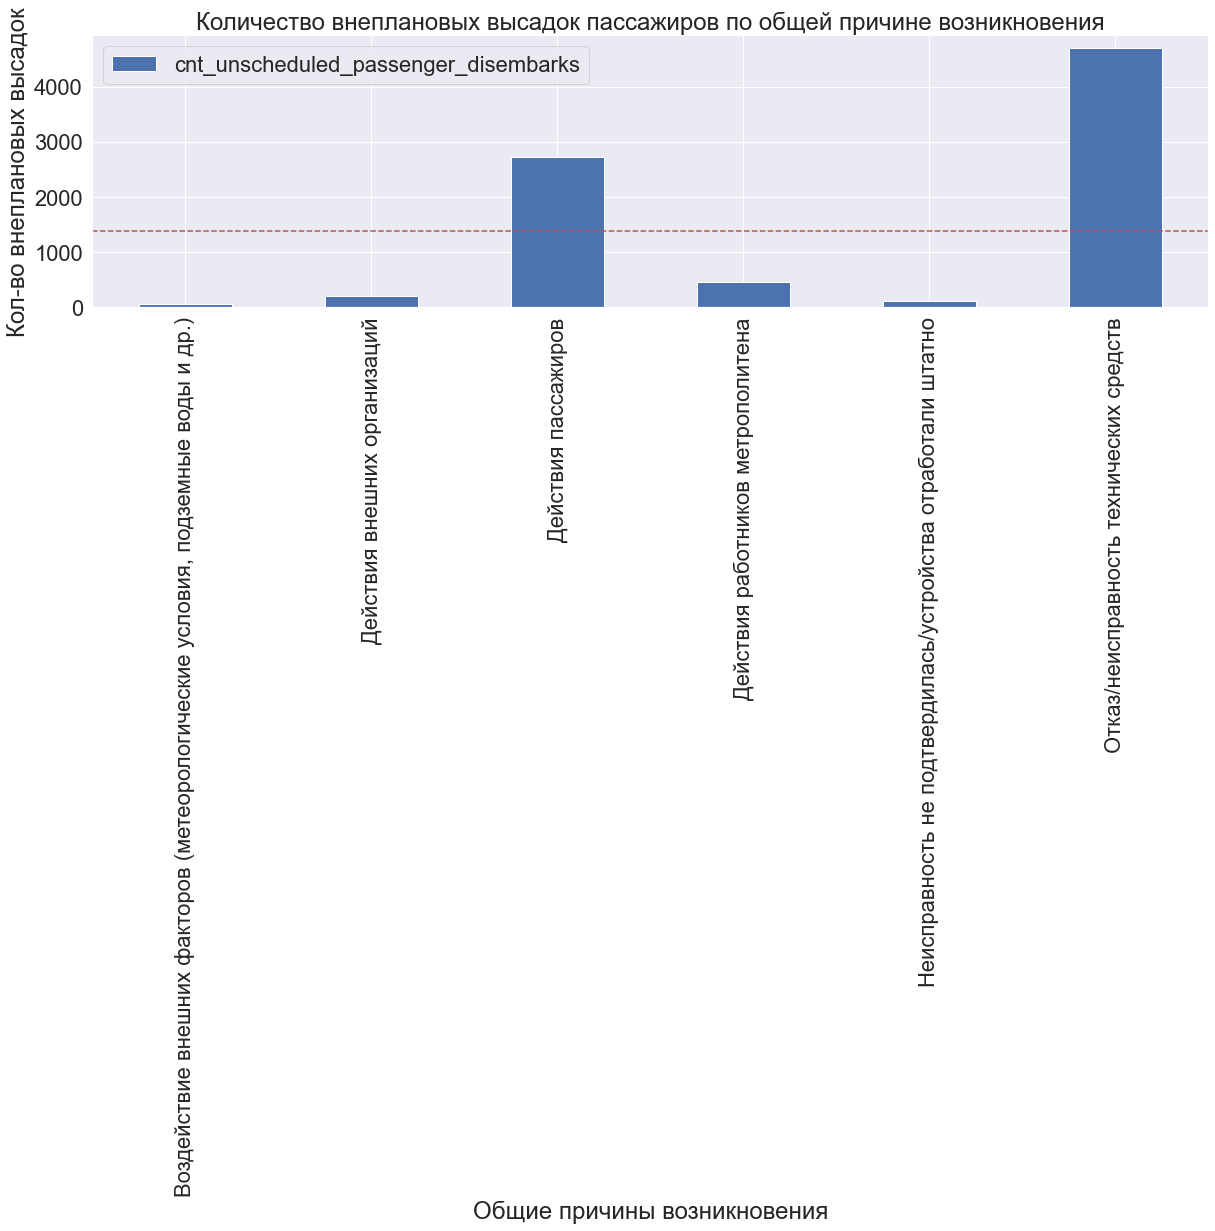

In [68]:
df_common_cause.plot(x = 'common_cause', y = 'cnt_unscheduled_passenger_disembarks', kind = 'bar', figsize=(20,5))
plt.axhline(y = df_common_cause['cnt_unscheduled_passenger_disembarks'].mean(), color = 'r', linestyle = '--')
plt.title('Количество внеплановых высадок пассажиров по общей причине возникновения')
plt.xlabel('Общие причины возникновения')
plt.ylabel('Кол-во внеплановых высадок')
plt.show();

----
Основными причинами возникновения нарушений являются "действия пассажиров" и "отказ/неисправность технических средств.

----

In [69]:
df_violation_type = data.pivot_table(index='violation_type', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'mean', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'mean'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_violation_type.columns = ['violation_type', 'cnt_case', 'cnt_late_trains', 'mean_cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'mean_traffic_break_in_minutes']
df_violation_type

,violation_type,cnt_case,cnt_late_trains,mean_cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,mean_traffic_break_in_minutes
0,Вандальные действия пассажиров в подвижном сос...,153,6,0.0,0,190,89,0.0
1,Внезапное перекрытие светофора,33,0,0.0,1,6,3,0.0
2,Заболевание/травма работника метрополитена,5,0,2.0,1,3,2,0.0
3,"Загорание (тление, задымление) шпал или пылевы...",37,0,2.0,6,58,41,0.0
4,"Загорание кабеля, электрооборудования на станц...",37,0,2.0,2,39,24,1.0
...,...,...,...,...,...,...,...,...
71,Срабатывание сигнализации шахты,4242,0,0.0,0,0,0,0.0
72,Сработала АПС,385,0,0.0,0,0,0,0.0
73,Столкновение поездов,1,0,320.0,1,202,202,330.0
74,Угроза наезда поезда (хозпоезда) на посторонни...,246,0,1.0,9,220,115,1.0


In [70]:
# Построим круговую диаграмму типы нарушений
#plt.figure(figsize=(11, 11))
#explode = [0.2]*df_violation_type['violation_type'].nunique()
#colors = sns.color_palette('GnBu')
#plt.pie(df_violation_type['cnt_late_trains'],
        #labels = df_violation_type['violation_type'].unique(),
        #colors = colors,
        #autopct = '%0.1f%%',
        #explode = explode,
        #shadow = 'True',
        #startangle = 90,
        #textprops = {'color': 'black','fontsize':8},
        #wedgeprops = {'linewidth': 6},
        #frame = 'true',
        #center = (0.1,0.1),
        #rotatelabels = False)
#plt.title('Доля типов нарушений', loc='center', size=12, color='darkblue', pad=80)
#plt.legend(df_violation_type['violation_type'].unique(), bbox_to_anchor=( 1.15 , 1 ), loc='upper left', borderaxespad= 0)
#plt.show();

In [71]:
df_violation_type.sort_values(by='cnt_case', ascending=False).head(5)

,violation_type,cnt_case,cnt_late_trains,mean_cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,mean_traffic_break_in_minutes
46,Остановка эскалатора ручкой СТОП из-за угрозы ...,24544,0,0.0,0,0,0,0.0
53,Падение пассажира на эскалаторе без травм,17879,0,0.0,0,0,0,0.0
41,Остановка эскалатора из-за попадания перевозим...,10373,0,0.0,0,0,0,0.0
47,Остановка эскалатора ручкой СТОП пассажирами,8252,0,0.0,0,0,0,0.0
23,Неисправность подвижного состава или хозяйстве...,6693,345,0.0,67,8490,4483,0.0


---- 
Основной причиной нарушений является "Остановка эскалатора ручкой СТОП из-за угрозы падения пассажира", которое не повлекло за собой опоздание поездов, полные отмены, участковые отмены, внеплановые высадки пассажиров.

-----

In [72]:
df_violation_type.sort_values(by='cnt_case').head(10)

,violation_type,cnt_case,cnt_late_trains,mean_cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,mean_traffic_break_in_minutes
37,Остановка эскалатора из-за неисправностей или ...,1,0,0.0,0,0,0,0.0
73,Столкновение поездов,1,0,320.0,1,202,202,330.0
68,"Разбиты витражные, дверные стёкла, зеркала на ...",1,0,0.0,0,0,0,0.0
30,Остановка лифта из-за нарушения безопасности п...,1,0,0.0,0,0,0,0.0
13,"Неисправности билетных касс, АРМ билетного кас...",1,0,0.0,0,0,0,0.0
75,"Эскалатор остановлен ручкой ""СТОП"" по необходи...",1,0,0.0,0,0,0,0.0
34,Остановка траволатора из-за нарушения внешнего...,2,0,0.0,0,0,0,0.0
11,Не выданы составы на линию в связи с отсутстви...,2,0,0.0,0,0,0,0.0
28,Ненадлежащее состояние поверхности катания рел...,3,0,0.0,0,4,2,0.0
16,Неисправность АРМ ДЦХ,4,0,0.0,0,0,0,0.0


------
Наиболее редкими причинами нарушений являются "Остановка эскалатора из-за неисправностей или неправильных действий персонала", "Столкновение поездов", "Разбиты витражные, дверные стёкла, зеркала на платформах, раскрашены двери, стены на станции или подуличном переходе, повреждены объекты метрополитена", "Остановка лифта из-за нарушения безопасности перевохки пассажиров или нарушения культуры обслуживания", "Неисправности билетных касс, АРМ билетного кассира", "Эскалатор остановлен ручкой "СТОП" по необходимости". Из них только столкновение поездов повлекло за собой 1 полную отмену и 202 участковых отмен.

------

In [73]:
df_reasons_for_occurrence = data.pivot_table(index='reasons_for_occurrence', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'mean', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'mean'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_reasons_for_occurrence.columns = ['reasons_for_occurrence', 'cnt_case', 'cnt_late_trains', 'mean_cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'mean_traffic_break_in_minutes']
df_reasons_for_occurrence

,reasons_for_occurrence,cnt_case,cnt_late_trains,mean_cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,mean_traffic_break_in_minutes
0,Срабатывание экстренного тормоза,1,0,0.0,0,0,0,0.0
1,БВ без снятия напряжения,84,8,0.0,0,109,61,0.0
2,БВ со снятием напряжения,39,3,2.0,3,92,52,2.0
3,В вагоне,1271,28,0.0,0,1451,1174,0.0
4,В вестибюле,24,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
200,Уборка вагона,537,16,0.0,0,623,317,0.0
201,Угроза наезда поезда (хозпоезда) на посторонни...,5,0,0.0,0,0,0,0.0
202,"Химическое, радиоактивное, биологическое зараж...",1,0,0.0,0,3,3,0.0
203,Частота не соответствует установленной,5,0,0.0,0,0,0,0.0


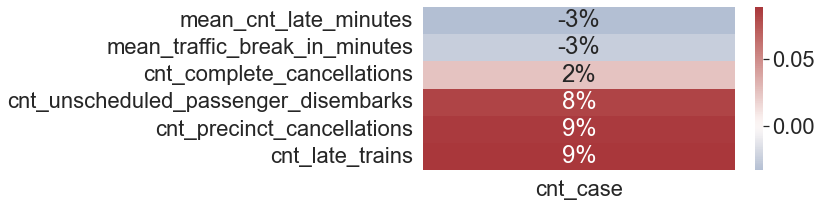

In [74]:
# Построим график зависимости количества случаев от типов нарушений
plt.figure(figsize=(7,3))
vlag = sns.color_palette("coolwarm")
sns.heatmap(df_reasons_for_occurrence.corr().loc[:,['cnt_case']].drop('cnt_case').sort_values('cnt_case'), cmap="vlag", annot=True, fmt='.0%', center=0);

----
Количество внеплановых высадок пассажиров, участковых отмен и опоздавших поездов зависит от типов нарушений

-----

In [75]:
df_device_name = data.pivot_table(index='device_name', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'mean', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'mean'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_device_name.columns = ['device_name', 'cnt_case', 'cnt_late_trains', 'mean_cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'mean_traffic_break_in_minutes']
df_device_name

,device_name,cnt_case,cnt_late_trains,mean_cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,mean_traffic_break_in_minutes
0,Дверь междупутного ходка,1,0,0.0,0,1,1,0.0
1,"СТП90-2, СТП91-2, КВ-1, СТП719-1",1,0,0.0,0,0,0,0.0
2,"""Сфера-8500""",1,0,0.0,0,0,0,0.0
3,АКП,680,0,0.0,0,0,0,0.0
4,"АКП, АПБ",1,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
725,Щитовой ящик,3,0,0.0,0,1,1,0.0
726,Электромагнитный ключ,1,0,0.0,0,1,0,0.0
727,Электромеханический замок,2,0,0.0,0,0,0,0.0
728,Эскалатор,73393,0,0.0,0,0,0,0.0


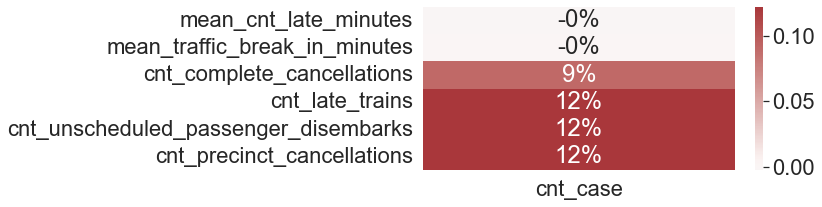

In [76]:
# Построим график зависимости количества случаев от устройства
plt.figure(figsize=(7,3))
vlag = sns.color_palette("coolwarm")
sns.heatmap(df_device_name.corr().loc[:,['cnt_case']].drop('cnt_case').sort_values('cnt_case'), cmap="vlag", annot=True, fmt='.0%', center=0);

----
Количество внеплановых высадок пассажиров, участковых отмен и опоздавших поездов зависит от устройства

----

In [77]:
df_device_part_name = data.pivot_table(index='device_part_name', aggfunc = {'beginning_case':'count', 'cnt_late_trains':'sum', 'cnt_late_minutes':'mean', 'cnt_complete_cancellations':'sum', 'cnt_precinct_cancellations':'sum', 'cnt_unscheduled_passenger_disembarks':'sum', 'traffic_break_in_minutes':'mean'}, values = ['beginning_case', 'cnt_late_trains', 'cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'traffic_break_in_minutes']).reset_index().round()
df_device_part_name.columns = ['device_part_name', 'cnt_case', 'cnt_late_trains', 'mean_cnt_late_minutes', 'cnt_complete_cancellations', 'cnt_precinct_cancellations', 'cnt_unscheduled_passenger_disembarks', 'mean_traffic_break_in_minutes']
df_device_part_name

,device_part_name,cnt_case,cnt_late_trains,mean_cnt_late_minutes,cnt_complete_cancellations,cnt_precinct_cancellations,cnt_unscheduled_passenger_disembarks,mean_traffic_break_in_minutes
0,1974,1,0,0.0,0,0,0,0.0
1,,64170,61,0.0,57,3525,2310,0.0
2,2523/25ФР,1,0,0.0,0,0,0,0.0
3,6311П1,1,0,0.0,0,0,0,0.0
4,773/75ФР,1,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
2305,№ 3066,1,0,0.0,0,0,0,0.0
2306,"№2671- 5, №5-6",1,0,0.0,0,0,0,0.0
2307,"№337в, 339",1,0,0.0,0,0,0,0.0
2308,"№5, №5а",1,0,0.0,0,0,0,0.0


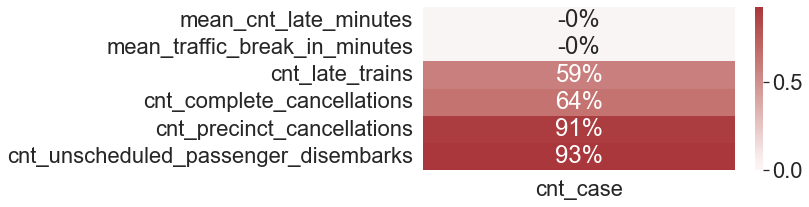

In [78]:
# Построим график зависимости количества случаев от детали устройства
plt.figure(figsize=(7,3))
vlag = sns.color_palette("coolwarm")
sns.heatmap(df_device_part_name.corr().loc[:,['cnt_case']].drop('cnt_case').sort_values('cnt_case'), cmap="vlag", annot=True, fmt='.0%', center=0);

---- 
Количество внеплановых высадок пассажиров, участковых отмен зависит от детали устройства

-----

''

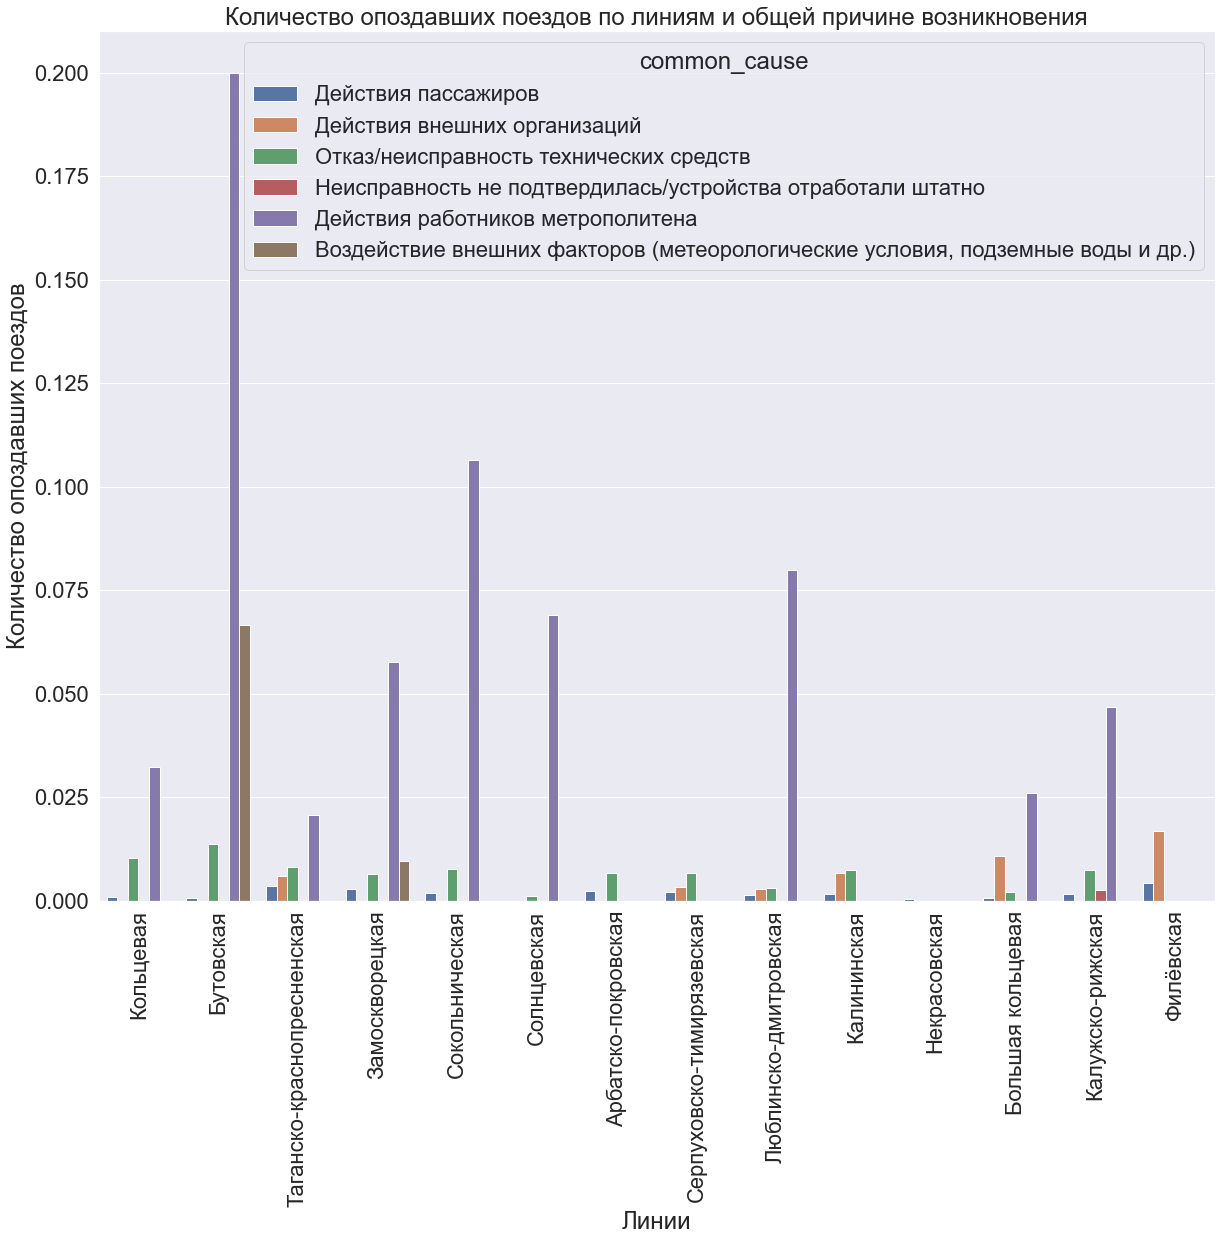

In [99]:
ax = sns.barplot(x='line',
            y='cnt_late_trains',
            hue="common_cause",
            errorbar=None,
            data=data   
)
plt.gcf().set_size_inches(20,16)
sns.set(font_scale=2)
plt.xticks(rotation=90)
ax.set_title('Количество опоздавших поездов по линиям и общей причине возникновения')
ax.set(xlabel='Линии', ylabel='Количество опоздавших поездов')
;

---
Поезда в основном опаздывали из-за действий работников метрополитена на Бутовской и Сокольнической линии.

-----

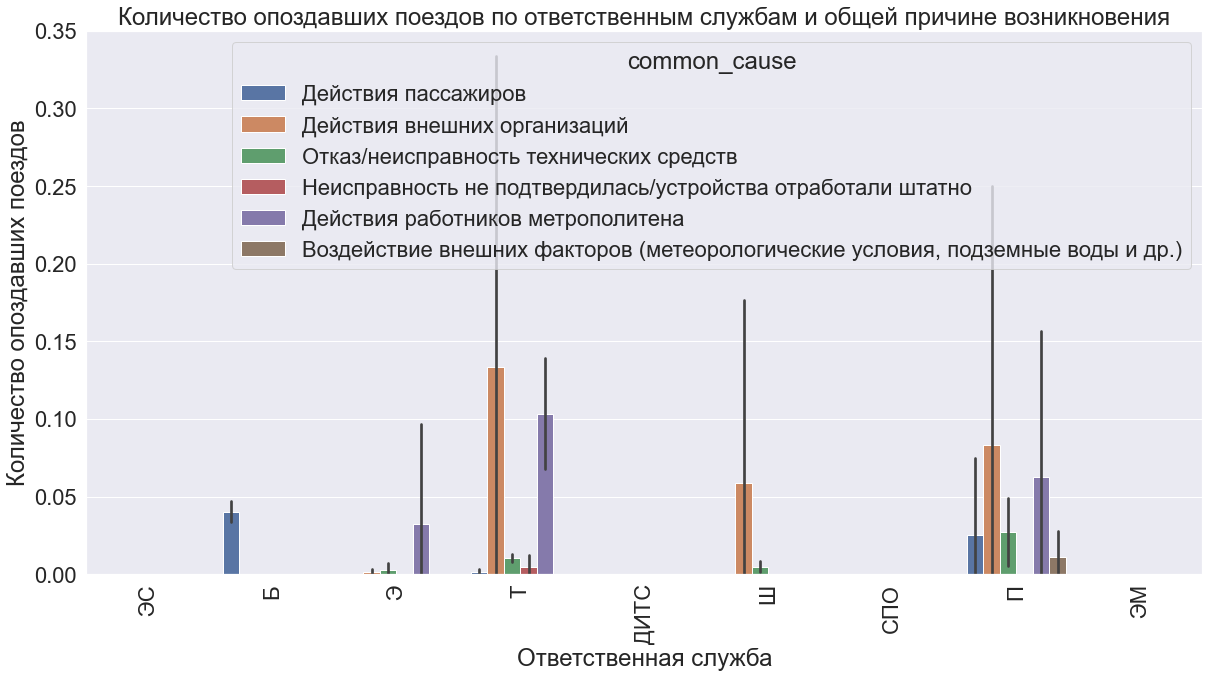

In [80]:
ax = sns.barplot(x='responsible_service',
            y='cnt_late_trains',
            hue="common_cause",
            data=data   
)
plt.gcf().set_size_inches(20,10)
sns.set(font_scale=2)
plt.xticks(rotation=90)
ax.set_title('Количество опоздавших поездов по ответственным службам и общей причине возникновения')
ax.set(xlabel='Ответственная служба', ylabel='Количество опоздавших поездов');

----
У службы подвижного состава поезда в основном опаздывали из-за действий внешних организаций.

----

------
------

### 4. Выводы



-----
----
* Количество полных отмен с полуночи до часу ночи, с 5 до 21 часа распределено равномерно и составляет не больше 20 случаев.  

* Количество опоздавших поездов больше с 5 до 10 часов, также с 15 до 21 часа.  

* Количество внеплановых высадок пассажиров увеличивается с 5 до 7 утра, с 8 до 10 часов, с 12 до 13 часов, с 14 до 17 часов, а снижается с 7 до 8 часов, с 10 до 12 часов, с 13 до 14 часов и после 17 часов равномерно идет на снижение.  

* Количество участковых отмен с 5 до 7 утра, с 8 до 9 часов, с 12 до 13 часов, с 14 до 17 часов, а снижается с 7 до 8 часов, с 9 до 12 часов, с 13 до 14 часов и после 17 часов  

* Участковые отмены чаще всего происходит по воскресеньям, реже всего по средам.

* Внеплановые высадки пассажиров чаще осуществляются по субботам и воскресеньям, реже осуществляются по вторникам и средам. 

* Поезда чаще опаздывают по пятницам, реже по вторникам и средам.

* Полные отмены осуществляются независимо от дня недели (распределение практически равномерное).

* Перерыв в движении в основном осуществлялся продолжительностью до 20 минут. Чаще всего 15 минут. Был единичный случай максимального перерыва в движении 330 минут, который можем определить как выброс вместе с другими разовыми случаями.


* Средний перерыв в движении 0,05 минут.


* Медианное значение перерыва в движении 20 минут.


* Нарушения происходили в 267 станциях.  

* Основное количество случаев пришлось на станцию 81.0 (максимальное количество нарушений 5306 ед.)

* Среднее количество случаев по станциям 382 ед. 

* Медианное количество случаев по станциям 254 ед.

* Минимальное количество случаев по станциям 17 ед.

* Больше всего случаев выявлено на станциях 81.0, 78.0, 189.0, 80.0, 68.0

* За весь период исследования по станциям в среднем опаздывает 1 поезд, максимальное количество опоздавших поездов по станциям 59 ед.  

* В среднем по станциям общее количество минут опоздания поездов составляет 17,7 минут.  

* Среднее количество полных отмен по станциям 2 ед, максимальное - 41 отмена.  

* Среднее количество участковых отмен по станциям 55 ед., медианное значение по количеству участковых отмен составляет 44 ед., максимальное количество участковых отмен по станциям 1778 ед. 

* Среднее количество внеплановых высадок пассажиров 30 случаев, медианное - 26 случаев, максимальное - 851 случай.

* Основное количество случаев, участковых отмен и внеплановых высадок приходится на I и II главные станционные пути.

* Количество опоздавших поездов выше среднего значения по Большой кольцевой, Калининской, Калужско-Рижской, Кольцевой, Таганско-Карснопресненской линиях.

* Количество участковых отмен почти в 2 раза выше среднего на Большой кольцевой и Замоскворецской линиях. Меньше всего участковых отмен на Бутовской, Некрасовской линиях.

* Количество внеплановых высадок пассажиров значительно выше среднего значения на Большой кольцевой, Замоскворецской и Таганско-Краснопресненской линиях. Внеплановых высадок пассажиров меньше всего осуществлялось на Бутовской и Некрасовской линиях.

* Основное количество опоздавших поездов, полных отмен, участковых отмен, внеплановых высадок пассажиров приходится на службу безопасности и службу подвижного состава.

* Основными причинами возникновения нарушений являются "действия пассажиров" и "отказ/неисправность технических средств.

* Основной причиной нарушений является "Остановка эскалатора ручкой СТОП из-за угрозы падения пассажира", которое не повлекло за собой опоздание поездов, полные отмены, участковые отмены, внеплановые высадки пассажиров.

* Наиболее редкими причинами нарушений являются "Остановка эскалатора из-за неисправностей или неправильных действий персонала", "Столкновение поездов", "Разбиты витражные, дверные стёкла, зеркала на платформах, раскрашены двери, стены на станции или подуличном переходе, повреждены объекты метрополитена", "Остановка лифта из-за нарушения безопасности перевохки пассажиров или нарушения культуры обслуживания", "Неисправности билетных касс, АРМ билетного кассира", "Эскалатор остановлен ручкой "СТОП" по необходимости". Из них только столкновение поездов повлекло за собой 1 полную отмену и 202 участковых отмен.

* Количество внеплановых высадок пассажиров, участковых отмен и опоздавших поездов зависит от типов нарушений

* Количество внеплановых высадок пассажиров, участковых отмен и опоздавших поездов зависит от устройства

* Количество внеплановых высадок пассажиров, участковых отмен зависит от детали устройства

* Поезда в основном опаздывали из-за действий работников метрополитена на Бутовской и Сокольнической линии.

* У службы подвижного состава поезда в основном опаздывали из-за действий внешних организаций.

-----
-----
